In [134]:
# IMPORT STATEMENTS - DO NOT CHANGE

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import mean_absolute_error
import graphviz
from matplotlib import pyplot as plt
from simpledbf import Dbf5

In [135]:
dbf = Dbf5('C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\Farmers_Data\\farmer_site_w_epic.dbf')
df_site = dbf.to_dataframe()

In [136]:
# impute zero data 
df_site['SIMUID_1'] = df_site.apply(
    lambda row: row['SIMUID_12'] if (row['SIMUID_1'] == 0) else row['SIMUID_1'],
    axis=1
)


In [137]:
# save new data file to merge with other field data 
df_site.to_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\field_w_simuid.csv")

In [138]:
# read in edited csv file
field = pd.read_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\edited_site_data.csv")
field_long = pd.read_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\edited_site_data_long.csv")
epic = pd.read_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\edited_epic_data.csv")

In [141]:
field_long

,Unnamed: 0,Site,Crop,Experiment,Treatment,Mineral N kg/ha/y,farmyard manure t/ha/year,Reported yield data (t DM/ha),Mean,min_yield,max_yield,Soil texture,LAT,SIMUID_1,Sand,Silt,Clay,variable,Yield
0,18,Hněvčeves,WWHT,140,71,0.0,0.0,grain,5.465730,4.183900,7.120800,clay loam,50.31,26449.0,35.0,30.0,35.0,2000,4.183900
1,20,Hněvčeves,WWHT,140,opt,100.0,10.0,grain,8.043293,6.931600,10.530700,clay loam,50.31,26449.0,35.0,30.0,35.0,2000,7.622467
2,22,Kostelec,WWHT,140,71,0.0,0.0,grain,4.670756,3.784000,5.805000,sandy loam,50.13,26787.0,65.0,25.0,10.0,2000,3.870000
3,24,Kostelec,WWHT,140,opt,100.0,10.0,grain,7.832689,6.819800,9.322400,sandy loam,50.13,26787.0,65.0,25.0,10.0,2000,7.163800
4,26,Pernolec,WWHT,140,71,0.0,0.0,grain,2.976460,1.969400,4.274200,sandy loam,49.77,23110.0,65.0,25.0,10.0,2000,2.468200
5,28,Pernolec,WWHT,140,opt,100.0,10.0,grain,5.467020,4.411800,6.794000,sandy loam,49.77,23110.0,65.0,25.0,10.0,2000,4.747200
6,30,Humpolec,WWHT,140,71,0.0,0.0,grain,3.048700,2.038200,3.947400,sandy loam,49.56,27956.0,65.0,25.0,10.0,2000,2.640200
7,31,Humpolec,WWHT,140,opt,100.0,10.0,grain,6.226400,4.609600,7.774400,sandy loam,49.56,27956.0,65.0,25.0,10.0,2000,6.192000
8,36,Kostelec,C180,140,71,0.0,0.0,above-ground biomass,14.353333,13.620000,15.310000,sandy loam,50.13,26787.0,65.0,25.0,10.0,2000,13.620000
9,38,Kostelec,C180,140,opt,120.0,10.0,above-ground biomass,19.526667,18.850000,20.260000,sandy loam,50.13,26787.0,65.0,25.0,10.0,2000,19.470000


In [142]:
epic_1 = pd.read_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\EPIC_CZcube_PARM2.csv")
epic_prec = epic_1[['SimUID', 'PRCP', 'YR']]

In [160]:
# pull precip data from epic based on SimuID 
site_precip = pd.merge(field_long, epic_prec, how = 'left', left_on = ['SIMUID_1', 'variable'], right_on = ['SimUID', 'YR']).drop_duplicates()

In [3]:
# SUMMARY STATISTICS FUNCTION FOR EPIC DATA
# DO NOT CHANGE
def variable_values_epic(data_frame, variable): 
    print ("Summary statistics for " + variable + ": \n")
    print ("Max: ", data_frame[variable].max())
    print ("Min: ", data_frame[variable].min())
    print ("Mean: ", data_frame[variable].mean())
    print ("Stdv: ", data_frame[variable].std())
    print ("25th percentile: ", data_frame[variable].quantile(.25))
    print ("75th percentile: ", data_frame[variable].quantile(.75))

### Generate Response Curves for unique CROP x NFERT combinations

In [149]:
# generate crop x nfert dataframes = 30 total dataframes with unique combos of texture and crop 
dataframes = []
for crop in epic_1.CROP.unique(): 
    for nfert in epic_1.NFERT.unique():
        dataframes.append(epic_1[(epic_1['CROP'] == crop) & (epic_1['NFERT'] == nfert)])
        
# generate crop dataframes
crop_dataframes = []
for crop in epic_1.CROP.unique(): 
    crop_dataframes.append(epic_1[(epic_1['CROP'] == crop)])

In [90]:
# generate yield vs ppt curves 
curves = [] 
for df in dataframes: 
    # pull crop and texture for the title
    crop = df.CROP.unique()[0]
    nfert = str(df.NFERT.unique()[0])
    
    fig_title = crop + "_x_" + nfert + "_yield_vs_ppt"
    fig_path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\epic_yield_response\\" + fig_title + ".jpg"
    
    # create a figure
    x = df['PRCP'].to_numpy()
    y = df['YLDG'].to_numpy()

    # generate a line of best fit
    coef = np.polyfit(x,y,1)
    # save that line for future use
    curves.append(coef)
    # poly1d_fn is now a function which takes in x and returns an estimate for y
    poly1d_fn = np.poly1d(coef) 

    plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k', markersize = 2)
    plt.savefig(fig_path)
    plt.clf()

<Figure size 432x288 with 0 Axes>

[4.07243102e-04 1.66099046e+00]


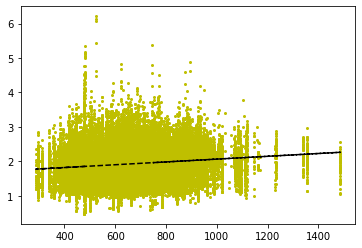

In [18]:
df = epic_1[(epic_1['CROP'] == 'WWHT') & (epic_1['NFERT'] == 15)]
x = df['PRCP'].to_numpy()
y = df['YLDG'].to_numpy()

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k', markersize = 2)
plt.show
#     plt.plot(x, y, 'o', markersize = 2)
#     plt.savefig(fig_path)
# plt.clf()
print (coef)

In [151]:
# generate yield vs nfert curves 
curves_fert = [] 
for df in crop_dataframes: 
    # pull crop and texture for the title
    crop = df.CROP.unique()[0]
    
    fig_title = crop + "_yield_vs_nfert"
    fig_path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\epic_yield_response\\" + fig_title + ".jpg"
    
    # create a figure
    x = df['NFERT'].to_numpy()
    y = df['YLDG'].to_numpy()

    # generate a line of best fit
    coef = np.polyfit(x,y,1)
    # save that line for future use
    curves_fert.append(coef)
    # poly1d_fn is now a function which takes in x and returns an estimate for y
    poly1d_fn = np.poly1d(coef) 

    plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k', markersize = 2)
    plt.savefig(fig_path)
    plt.clf()

<Figure size 432x288 with 0 Axes>

### compare epic curves to point data from sites 

In [147]:
# make NFERT values match and tex class valuse match 
site_precip = site_precip[site_precip['Mineral N kg/ha/y'].notna()]
site_precip.loc[(site_precip['Mineral N kg/ha/y'] >= 90), 'Mineral N kg/ha/y'] = 100
site_precip.loc[(site_precip['Mineral N kg/ha/y'] <=30), 'Mineral N kg/ha/y'] = 15
site_precip.loc[(site_precip['Mineral N kg/ha/y'] <=70) & (field['Mineral N kg/ha/y'] >=50), 'Mineral N kg/ha/y'] = 60
site_precip['Mineral N kg/ha/y'] = site_precip['Mineral N kg/ha/y'].astype('int64')

site_precip.loc[(site_precip['Soil texture'] == 'loam'), 'Soil texture'] = 'Lo'
site_precip.loc[(site_precip['Soil texture'] == 'clay loam'), 'Soil texture'] = 'ClLo'
site_precip.loc[(site_precip['Soil texture'] == 'sandy loam'), 'Soil texture'] = 'SaLo'
site_precip.loc[(site_precip['Soil texture'] == 'loamy sand'), 'Soil texture'] = 'LoSa'

C:\Users\Research\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [162]:
# split site data by crop and nfert value 
site_dataframes = []
for crop in epic_1.CROP.unique(): 
    for nfert in epic_1.NFERT.unique():
        site_dataframes.append(site_precip[(site_precip['Crop'] == crop) & (site_precip['Mineral N kg/ha/y'] == nfert)])
        
site_crop_dfs = []
for crop in epic_1.CROP.unique():
    site_crop_dfs.append(site_precip[site_precip['Crop'] == crop])

In [125]:
count = 0
for df in site_dataframes: 
    epic_curve = curves[count]
    poly1d_fn = np.poly1d(epic_curve) 
    df['epic_yield_pred'] = poly1d_fn(df['PRCP'])
    df['epic_distance'] =  df['epic_yield_pred'] - df['Yield']  
    count+=1

C:\Users\Research\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Research\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
count = 0
for df in site_crop_dfs: 
    epic_curve = curves_fert[count]
    poly1d_fn = np.poly1d(epic_curve) 
    df['epic_yield_pred_nfert'] = poly1d_fn(df['Mineral N kg/ha/y'])
    df['epic_distance_nfert'] =  df['epic_yield_pred_nfert'] - df['Yield']  
    count+=1

C:\Users\Research\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Research\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
count = 0
for df in site_dataframes: 
    if len(df) > 0:
        # pull crop and texture for the title
        crop = df['Crop'].unique()[0]
        nfert = str(df['Mineral N kg/ha/y'].unique()[0])

        fig_title = crop + "_x_" + nfert + "_yield_vs_ppt_pointwise_field"
        fig_path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\epic_yield_response\\" + fig_title + ".jpg"

        # create a figure
        site_x = df['PRCP'].to_numpy()
        site_y = df['Yield'].to_numpy()
        
        x = dataframes[count]['PRCP'].to_numpy()
        y = dataframes[count]['YLDG'].to_numpy()

        # generate a line of best fit
        coef = np.polyfit(x,y,1)
        # save that line for future use
        curves.append(coef)
        # poly1d_fn is now a function which takes in x and returns an estimate for y
        poly1d_fn = np.poly1d(coef) 

        plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k', markersize = 2)
        plt.plot(site_x, site_y, 'ro', markersize = 2)
        plt.savefig(fig_path)
        plt.clf()
    count +=1 

<Figure size 432x288 with 0 Axes>

In [164]:
count = 0
for df in site_crop_dfs: 
    if len(df) > 0:
        # pull crop and texture for the title
        crop = df['Crop'].unique()[0]

        fig_title = crop +  "_yield_vs_nfert_pointwise_field"
        fig_path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\epic_yield_response\\" + fig_title + ".jpg"

        # create a figure
        site_x = df['Mineral N kg/ha/y'].to_numpy()
        site_y = df['Yield'].to_numpy()
        
        x = crop_dataframes[count]['NFERT'].to_numpy()
        y = crop_dataframes[count]['YLDG'].to_numpy()

        # generate a line of best fit
        coef = np.polyfit(x,y,1)
        # save that line for future use
        curves_fert.append(coef)
        # poly1d_fn is now a function which takes in x and returns an estimate for y
        poly1d_fn = np.poly1d(coef) 

        plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k', markersize = 2)
        plt.plot(site_x, site_y, 'ro', markersize = 2)
        plt.savefig(fig_path)
        plt.clf()
    count +=1 

<Figure size 432x288 with 0 Axes>

In [166]:
for df in site_crop_dfs: 
    print (df['Crop'].unique())
    print (df['epic_distance_nfert'].mean())

['WWHT']
-2.3340062847690475
['BARL']
-0.7398539687023631
['C100']
-3.2545303850516127
[]
nan
['C180']
-11.12739098272357


In [126]:
# save to csv files 
for df in site_dataframes: 
    if len(df) > 0: 
        crop_name = df['Crop'].unique()[0]
        print (crop_name)
        nfert = str(df['Mineral N kg/ha/y'].unique()[0])
        print (nfert)
        path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\epic_yield_response\\pointwise_field_to_epic_" + crop_name + "_nfert_" + nfert + ".csv"
        df.to_csv(path)

WWHT
15
WWHT
60
WWHT
100
BARL
15
BARL
60
BARL
100
C100
15
C100
100
C180
15
C180
100


In [119]:
len(site_dataframes[1])

140

In [113]:
len(site_dataframes[3])

0

### Compare epic to all field time series records

In [3]:
field = field[field['NFERT'].notna()]

In [4]:
# make NFERT values match and tex class valuse match 
field.loc[(field['NFERT'] >= 90), 'NFERT'] = 100
field.loc[(field['NFERT'] <=30), 'NFERT'] = 15
field.loc[(field['NFERT'] <=70) & (field['NFERT'] >=50), 'NFERT'] = 60
field['NFERT'] = field['NFERT'].astype('int64')

field.loc[(field['Soil texture'] == 'loam'), 'Soil texture'] = 'Lo'
field.loc[(field['Soil texture'] == 'clay loam'), 'Soil texture'] = 'ClLo'
field.loc[(field['Soil texture'] == 'sandy loam'), 'Soil texture'] = 'SaLo'
field.loc[(field['Soil texture'] == 'loamy sand'), 'Soil texture'] = 'LoSa'

In [25]:
def sum_e_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += (predicted[i] - actual[i])
        return (sum_error)

In [9]:
# function which takes one row (record) of time series data, compares to epic filters, calculates NSE 
def epicxcrop(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]
    
    
    # compare row to epic x crop 
    epic_c = epic[epic['CROP'] == row['CROP']]
    med_epic_c = epic_c[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)
    
    # pull out the non-nan yield values from epic median data
    med_epic_c_masked = med_epic_c*masked
    epic_yldg_c = med_epic_c_masked[med_epic_c_masked != 0]
    
    
    # compute accuracy - R^2  
#     R_2_crop = r2_score(field_yldg, epic_yldg_c)
    MAE_crop = mean_absolute_error(field_yldg, epic_yldg_c)
    
    return (round(MAE_crop, 2))
    
    
def epicxcropxfert(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]
    
    # compare row to epic x crop x nfert
    epic_cf = epic[(epic['CROP'] == row['CROP']) & (epic['mean_NFERT'] == row['NFERT'])]
    med_epic_cf = epic_cf[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)
    
    # pull out the non-nan yield values from epic median data
    med_epic_cf_masked = med_epic_cf*masked
    epic_yldg_cf = med_epic_cf_masked[med_epic_cf_masked != 0]
    
    # compute accuracy - R^2  
#     R_2_cropf = r2_score(field_yldg, epic_yldg_cf)
    MAE_cropf = mean_absolute_error(field_yldg, epic_yldg_cf)
    
    return (round(MAE_cropf,2))

    

def epicxcropxfertxprec(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]
    
    # compare row to epic x crop x nfert x precip
    try:
        epic_cfp = epic[(epic['CROP'] == row['CROP']) & (epic['mean_NFERT'] == row['NFERT']) & (epic['mean_PRCP']<= (row['Prec (mm)']+10)) & (epic['mean_PRCP'] >= (row['Prec (mm)']-10))]
        med_epic_cfp = epic_cfp[['2000', '2001', '2002',
           '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)

        # pull out the non-nan yield values from epic median data
        med_epic_cfp_masked = med_epic_cfp*masked
        epic_yldg_cfp = med_epic_cfp_masked[med_epic_cfp_masked != 0]

        # compute accuracy - R^2  
#         R_2_cropfp = r2_score(field_yldg, epic_yldg_cfp)
        MAE_cropfp = mean_absolute_error(field_yldg, epic_yldg_cfp)

    except: 
#         R_2_cropfp = np.nan
        MAE_cropfp = np.nan
    return (round(MAE_cropfp, 2))

        
def epicxcropxfertxprecxtex(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]        
            
    # compare row to epic x crop x nfert x precip x texture 
    try:
        epic_cfpt = epic[(epic['CROP'] == row['CROP']) & (epic['mean_NFERT'] == row['NFERT']) & (epic['mean_PRCP']<= (row['Prec (mm)']+10)) & (epic['mean_PRCP'] >= (row['Prec (mm)']-10)) & (epic['CLASS'] == row['Soil texture'])]
        med_epic_cfpt = epic_cfpt[['2000', '2001', '2002',
           '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)

        # pull out the non-nan yield values from epic median data
        med_epic_cfpt_masked = med_epic_cfpt*masked
        epic_yldg_cfpt = med_epic_cfpt_masked[med_epic_cfpt_masked != 0]

        # compute accuracy - R^2  
#         R_2_cropfpt = r2_score(field_yldg, epic_yldg_cfpt)
        MAE_cropfpt = mean_absolute_error(field_yldg, epic_yldg_cfpt)

    except:
#         R_2_cropfpt = np.nan
        MAE_cropfpt = np.nan
    return (round(MAE_cropfpt, 2))
    
    

In [26]:
# function which takes one row (record) of time series data, compares to epic filters, calculates NSE 
def epicxcrop_sumerr(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]
    
    
    # compare row to epic x crop 
    epic_c = epic[epic['CROP'] == row['CROP']]
    med_epic_c = epic_c[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)
    
    # pull out the non-nan yield values from epic median data
    med_epic_c_masked = med_epic_c*masked
    epic_yldg_c = med_epic_c_masked[med_epic_c_masked != 0]
    
    
    # compute accuracy -  
    E_crop = sum_e_metric(field_yldg, epic_yldg_c)
    
    return (round(E_crop, 2))
    
    
def epicxcropxfert_sumerr(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]
    
    # compare row to epic x crop x nfert
    epic_cf = epic[(epic['CROP'] == row['CROP']) & (epic['mean_NFERT'] == row['NFERT'])]
    med_epic_cf = epic_cf[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)
    
    # pull out the non-nan yield values from epic median data
    med_epic_cf_masked = med_epic_cf*masked
    epic_yldg_cf = med_epic_cf_masked[med_epic_cf_masked != 0]
    
    # compute accuracy   
    E_cropf = sum_e_metric(field_yldg, epic_yldg_cf)
    
    return (round(E_cropf,2))

    

def epicxcropxfertxprec_sumerr(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]
    
    # compare row to epic x crop x nfert x precip
    try:
        epic_cfp = epic[(epic['CROP'] == row['CROP']) & (epic['mean_NFERT'] == row['NFERT']) & (epic['mean_PRCP']<= (row['Prec (mm)']+10)) & (epic['mean_PRCP'] >= (row['Prec (mm)']-10))]
        med_epic_cfp = epic_cfp[['2000', '2001', '2002',
           '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)

        # pull out the non-nan yield values from epic median data
        med_epic_cfp_masked = med_epic_cfp*masked
        epic_yldg_cfp = med_epic_cfp_masked[med_epic_cfp_masked != 0]

        # compute accuracy -   
        E_cropfp = sum_e_metric(field_yldg, epic_yldg_cfp)

    except: 
        E_cropfp = np.nan
    return (round(E_cropfp, 2))

        
def epicxcropxfertxprecxtex_sumerr(row):
    # pull out row level yield stats 
    ylds = row[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy(dtype=float)
    
    # make a mask to only compare non-nan values
    masked = np.nan_to_num(ylds)
    masked[masked > 0] = 1
    
    # pull out the non-nan yield values from field data
    yld_masked = ylds*masked
    field_yldg = yld_masked[~np.isnan(yld_masked)]        
            
    # compare row to epic x crop x nfert x precip x texture 
    try:
        epic_cfpt = epic[(epic['CROP'] == row['CROP']) & (epic['mean_NFERT'] == row['NFERT']) & (epic['mean_PRCP']<= (row['Prec (mm)']+10)) & (epic['mean_PRCP'] >= (row['Prec (mm)']-10)) & (epic['CLASS'] == row['Soil texture'])]
        med_epic_cfpt = epic_cfpt[['2000', '2001', '2002',
           '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
           '2012', '2013', '2014', '2015', '2016', '2017']].median().to_numpy(dtype=float)

        # pull out the non-nan yield values from epic median data
        med_epic_cfpt_masked = med_epic_cfpt*masked
        epic_yldg_cfpt = med_epic_cfpt_masked[med_epic_cfpt_masked != 0]

        # compute accuracy -
        E_cropfpt = sum_e_metric(field_yldg, epic_yldg_cfpt)

    except:
        E_cropfpt = np.nan
    return (round(E_cropfpt, 2))

In [27]:
# field['R2_crop'] = field.apply(epicxcrop, axis = 1)
# field['R2_cropxfert'] = field.apply(epicxcropxfert, axis = 1)
# field['R2_crpoxfertxprec'] = field.apply(epicxcropxfertxprec, axis = 1)
# field['R2_cropxfertxprecxtex'] = field.apply(epicxcropxfertxprecxtex, axis = 1)

field['MAE_crop'] = field.apply(epicxcrop, axis = 1)
field['MAE_cropxfert'] = field.apply(epicxcropxfert, axis = 1)
field['MAE_crpoxfertxprec'] = field.apply(epicxcropxfertxprec, axis = 1)
field['MAE_cropxfertxprecxtex'] = field.apply(epicxcropxfertxprecxtex, axis = 1)

field['sumerr_crop'] = field.apply(epicxcrop_sumerr, axis = 1)
field['sumerr_cropxfert'] = field.apply(epicxcropxfert_sumerr, axis = 1)
field['sumerr_crpoxfertxprec'] = field.apply(epicxcropxfertxprec_sumerr, axis = 1)
field['sumerr_cropxfertxprecxtex'] = field.apply(epicxcropxfertxprecxtex_sumerr, axis = 1)

In [28]:
field

,Unnamed: 0,Site,CROP,Experiment,Treatment,NFERT,manure,Reported yield data (t DM/ha),2000,2001,...,Silt,Clay,MAE_crop,MAE_cropxfert,MAE_crpoxfertxprec,MAE_cropxfertxprecxtex,sumerr_crop,sumerr_cropxfert,sumerr_crpoxfertxprec,sumerr_cropxfertxprecxtex
0,0,Kroměříž,WWHT,norf,NaN,100,12.5,grain,NaN,5.865000,...,40.0,20.0,3.31,2.80,2.88,2.83,-1.91,-1.35,-1.09,-1.11
1,1,Kroměříž,WWHT,mono,all,100,0.0,grain,NaN,4.760000,...,40.0,20.0,2.09,1.70,1.78,1.75,-0.80,-0.25,0.01,-0.01
2,2,Kroměříž,BARL,norf,0,15,12.5,grain,NaN,3.808000,...,40.0,20.0,2.11,3.95,4.02,3.92,0.23,-1.58,-1.72,-1.57
3,3,Kroměříž,BARL,norf,30,15,12.5,grain,NaN,4.318000,...,40.0,20.0,2.36,4.23,4.30,4.20,-0.28,-2.09,-2.23,-2.08
4,4,Kroměříž,BARL,norf,60,60,12.5,grain,NaN,4.292500,...,40.0,20.0,2.27,2.78,2.78,2.73,-0.26,-0.75,-0.83,-0.75
5,5,Kroměříž,BARL,mono,0,15,0.0,grain,NaN,2.465000,...,40.0,20.0,1.13,2.07,2.14,2.05,1.57,-0.24,-0.38,-0.23
6,6,Kroměříž,BARL,mono,60,60,0.0,grain,NaN,3.145000,...,40.0,20.0,1.29,1.73,1.72,1.68,0.89,0.39,0.32,0.40
7,7,Kroměříž,BARL,mono,90,100,0.0,grain,NaN,3.340500,...,40.0,20.0,1.38,1.02,1.05,1.03,0.69,1.34,1.44,1.48
8,8,Hněvčeves,BARL,106,OS1,60,0.0,grain,NaN,5.151096,...,30.0,35.0,2.34,2.86,2.84,2.76,-1.12,-1.61,-1.69,-1.50
9,9,Hněvčeves,WWHT,140,71,15,0.0,grain,4.183900,NaN,...,30.0,35.0,1.75,3.59,3.68,3.70,-0.59,-2.39,-2.47,-2.44


In [22]:
curves[2]

array([4.82544545e-04, 4.05212645e+00])

In [29]:
# field.to_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\field_filtered_R2.csv")
field.to_csv("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\field_filtered_MAE_err.csv")

In [16]:
best = field[(field['MAE_crop'] > field['MAE_cropxfert']) &  (field['MAE_cropxfert'] > field['MAE_crpoxfertxprec'])]
sec_best = field[field['MAE_crop'] > field['MAE_cropxfert']]

## one site comparison 

In [3]:
z = field[field['Site'] == "Žabčice"]

In [4]:
z_barl = z[z['CROP'] == 'BARL']

In [5]:
z

,Unnamed: 0,Site,CROP,Experiment,Treatment,NFERT,manure,Reported yield data (t DM/ha),2000,2001,...,2017,2018,mean_YLDG,min_YLDG,max_YLDG,Prec (mm),Soil texture,Sand,Silt,Clay
33,33,Žabčice,BARL,DP23-mono,0,0.0,0.0,grain,NaN,2.2610,...,4.0970,NaN,3.945500,1.7595,6.3410,480.0,clay loam,35.0,30.0,35.0
34,34,Žabčice,BARL,DP23-mono,30,30.0,0.0,grain,NaN,2.9750,...,5.2190,NaN,4.923000,2.5330,7.3440,480.0,clay loam,35.0,30.0,35.0
35,35,Žabčice,BARL,DP23-mono,60,60.0,0.0,grain,NaN,3.4170,...,5.9330,NaN,5.465500,2.7710,7.5735,480.0,clay loam,35.0,30.0,35.0
36,36,Žabčice,BARL,DP23-mono,90,90.0,0.0,grain,NaN,3.5955,...,6.6640,NaN,5.513000,2.8900,7.4970,480.0,clay loam,35.0,30.0,35.0
37,37,Žabčice,WWHT,DP23-mono,0,0.0,0.0,grain,NaN,NaN,...,5.1765,NaN,5.654767,1.2665,9.0610,480.0,clay loam,35.0,30.0,35.0
38,38,Žabčice,WWHT,DP23-mono,100,100.0,0.0,grain,NaN,NaN,...,5.2020,NaN,6.014600,0.9350,9.0100,480.0,clay loam,35.0,30.0,35.0
39,39,Žabčice,C100,DP23-mono,0,0.0,25.0,grain,NaN,NaN,...,3.2766,NaN,6.763040,2.8896,12.2292,480.0,clay loam,35.0,30.0,35.0
40,40,Žabčice,C100,DP23-mono,120,120.0,25.0,grain,NaN,NaN,...,5.6330,NaN,7.377653,2.6144,12.5560,480.0,clay loam,35.0,30.0,35.0


In [97]:
epic['CLASS'].unique()

array(['Lo', 'SaLo', 'SaClLo', 'ClLo', 'Cl', 'SiLo'], dtype=object)

In [92]:
z_barl_mean = z_barl['mean_YLDG'].to_numpy()
z_barl_mean_0N = z_barl[z_barl['NFERT'] == 0]['mean_YLDG'].to_numpy()
z_barl_mean_30N = z_barl[z_barl['NFERT'] == 30]['mean_YLDG'].to_numpy()
z_barl_mean_60N = z_barl[z_barl['NFERT'] == 60]['mean_YLDG'].to_numpy()
z_barl_mean_90N = z_barl[z_barl['NFERT'] == 90]['mean_YLDG'].to_numpy()



In [93]:
# epic data filtered similarly, pull out mean yields over all the years
epic_CROP = epic[epic['CROP'] == 'BARL']
epic_CROP_0nfert = epic_CROP[epic_CROP['mean_NFERT'] == 15]
epic_CROP_60nfert = epic_CROP[epic_CROP['mean_NFERT'] == 60]
epic_CROP_100nfert = epic_CROP[epic_CROP['mean_NFERT'] == 100]

# epic_CROP_nfert_precip = epic_CROP_nfert[(epic_CROP_nfert['mean_PRCP'] >= 460) & (epic_CROP_nfert['mean_PRCP'] <= 500)]
# epic_CROP_nfert_precip_tex = epic_CROP_nfert_precip[epic_CROP_nfert_precip['CLASS'] == 'ClLo']

# then pull out yields 
epic_CROP_yldg = epic_CROP['mean_YLDG'].to_numpy()
epic_CROP_0nfert_yldg = epic_CROP_0nfert['mean_YLDG'].to_numpy()
epic_CROP_60nfert_yldg = epic_CROP_60nfert['mean_YLDG'].to_numpy()
epic_CROP_100nfert_yldg = epic_CROP_100nfert['mean_YLDG'].to_numpy()

# epic_CROP_nfert_precip_yldg = epic_CROP_nfert_precip['mean_YLDG'].to_numpy()
# epic_CROP_nfert_precip_tex_yld = epic_CROP_nfert_precip_tex['mean_YLDG'].to_numpy()

## What can epic tell me when all I have is the site location, crop, and a general estimate of yield?


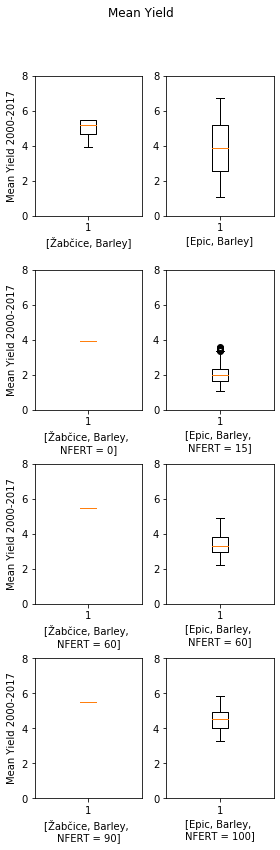

In [94]:
# What can epic tell me when all I have is the site location, crop, and a general estimate of yield?
# 2000-2018 mean yields for a given site x crop VS 2000-2018 mean yields for all epic x crop

fig = plt.figure(figsize=(4, 12))
fig.suptitle('Mean Yield')

ax0 = fig.add_subplot(4,2,1)
ax1 = fig.add_subplot(4,2,2)
ax2 = fig.add_subplot(4,2,3)
ax3 = fig.add_subplot(4,2,4)
ax4 = fig.add_subplot(4,2,5)
ax5 = fig.add_subplot(4,2,6)
ax6 = fig.add_subplot(4,2,7)
ax7 = fig.add_subplot(4,2,8)


ax0.boxplot(z_barl_mean)
ax1.boxplot(epic_CROP_yldg)
ax2.boxplot(z_barl_mean_0N)
ax3.boxplot(epic_CROP_0nfert_yldg)
ax4.boxplot(z_barl_mean_60N)
ax5.boxplot(epic_CROP_60nfert_yldg)
ax6.boxplot(z_barl_mean_90N)
ax7.boxplot(epic_CROP_100nfert_yldg)


ax0.set_xlabel('[Žabčice, Barley]')
ax0.set_ylabel('Mean Yield 2000-2017')

ax1.set_xlabel('[Epic, Barley]')
ax2.set_ylabel('Mean Yield 2000-2017')
ax2.set_xlabel('[Žabčice, Barley, \nNFERT = 0]')
ax3.set_xlabel('[Epic, Barley, \nNFERT = 15]')
ax4.set_ylabel('Mean Yield 2000-2017')
ax4.set_xlabel('[Žabčice, Barley, \nNFERT = 60]')
ax5.set_xlabel('[Epic, Barley, \nNFERT = 60]')
ax6.set_ylabel('Mean Yield 2000-2017')
ax6.set_xlabel('[Žabčice, Barley, \nNFERT = 90]')
ax7.set_xlabel('[Epic, Barley, \nNFERT = 100]')

# ax3.set_xlabel('[Epic, Barley, 100, \n460mm-500mm]')
# ax4.set_xlabel('[Epic, Barley, 100, \n460mm-500mm, clay loam]')

ax0.set_ylim([0, 8])
ax1.set_ylim([0, 8])
ax2.set_ylim([0, 8])
ax3.set_ylim([0, 8])
ax4.set_ylim([0, 8])
ax5.set_ylim([0, 8])
ax6.set_ylim([0, 8])
ax7.set_ylim([0, 8])

# ax3.set_ylim([0, 10])
# ax4.set_ylim([0, 10])

fig.tight_layout()
fig.subplots_adjust(top=0.90)

plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\boxplot_Žabčice_BARLmeans_to_epic.jpg")

## What can epic tell me if I have site location, crop, and yearly estimates of yield? 


In [106]:
# What can epic tell me if I have site location, crop, and yearly estimates of yield? 
# time series of yields for a given site x crop VS time series of yields for all epic x crop 
z_barl_ts = z[z['CROP'] == 'BARL'][['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
z_barl_ts_0N = z_barl[z_barl['NFERT'] == 0][['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy().reshape((18,))
# z_barl_ts_30N = z_barl[z_barl['NFERT'] == 30][['2000', '2001', '2002',
#        '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
#        '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
z_barl_ts_60N = z_barl[z_barl['NFERT'] == 60][['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy().reshape((18,))
z_barl_ts_90N = z_barl[z_barl['NFERT'] == 90][['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy().reshape((18,))

# epic data filtered similarly, pull out mean yields over all the years
epic_CROP = epic[epic['CROP'] == 'BARL']
epic_CROP_0nfert = epic_CROP[epic_CROP['mean_NFERT'] == 15]
epic_CROP_60nfert = epic_CROP[epic_CROP['mean_NFERT'] == 60]
epic_CROP_100nfert = epic_CROP[epic_CROP['mean_NFERT'] == 100]

epic_CROP_0nfert_ppt = epic_CROP_0nfert[(epic_CROP_0nfert['mean_PRCP'] >= 460) & (epic_CROP_0nfert['mean_PRCP'] <= 500)]
epic_CROP_60nfert_ppt = epic_CROP_60nfert[(epic_CROP_60nfert['mean_PRCP'] >= 460) & (epic_CROP_60nfert['mean_PRCP'] <= 500)]
epic_CROP_100nfert_ppt = epic_CROP_100nfert[(epic_CROP_100nfert['mean_PRCP'] >= 460) & (epic_CROP_100nfert['mean_PRCP'] <= 500)]

epic_CROP_0nfert_tex = epic_CROP_0nfert[epic_CROP_0nfert['CLASS'] == 'ClLo']
epic_CROP_60nfert_tex = epic_CROP_60nfert[epic_CROP_60nfert['CLASS'] == 'ClLo']
epic_CROP_100nfert_tex = epic_CROP_100nfert[epic_CROP_100nfert['CLASS'] == 'ClLo']

# then pull out yields 
epic_CROP_yldg = epic_CROP[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_0nfert_yldg = epic_CROP_0nfert[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_60nfert_yldg = epic_CROP_60nfert[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_100nfert_yldg = epic_CROP_100nfert[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_0nfert_ppt_yldg = epic_CROP_0nfert_ppt[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_60nfert_ppt_yldg = epic_CROP_60nfert_ppt[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_100nfert_ppt_yldg = epic_CROP_100nfert_ppt[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_0nfert_tex_yldg = epic_CROP_0nfert_tex[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_60nfert_tex_yldg = epic_CROP_60nfert_tex[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()
epic_CROP_100nfert_tex_yldg = epic_CROP_100nfert_tex[['2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].to_numpy()

In [107]:
# find boundaries of the epic runs & full barley field runs 
epic_CROP_yldg_mins = epic_CROP_yldg.min(axis=0)
epic_CROP_0nfert_yldg_mins = epic_CROP_0nfert_yldg.min(axis=0)
epic_CROP_60nfert_yldg_mins = epic_CROP_60nfert_yldg.min(axis=0)
epic_CROP_100nfert_yldg_mins = epic_CROP_100nfert_yldg.min(axis=0)
epic_CROP_0nfert_ppt_yldg_mins = epic_CROP_0nfert_ppt_yldg.min(axis= 0)
epic_CROP_60nfert_ppt_yldg_mins = epic_CROP_60nfert_ppt_yldg.min(axis= 0)
epic_CROP_100nfert_ppt_yldg_mins = epic_CROP_100nfert_ppt_yldg.min(axis= 0)
epic_CROP_0nfert_tex_yldg_mins = epic_CROP_0nfert_tex_yldg.min(axis= 0)
epic_CROP_60nfert_tex_yldg_mins = epic_CROP_60nfert_tex_yldg.min(axis= 0)
epic_CROP_100nfert_tex_yldg_mins = epic_CROP_100nfert_tex_yldg.min(axis= 0)
z_barl_mins = z_barl_ts.min(axis=0)

epic_CROP_yldg_maxs = epic_CROP_yldg.max(axis=0)
epic_CROP_0nfert_yldg_maxs = epic_CROP_0nfert_yldg.max(axis=0)
epic_CROP_60nfert_yldg_maxs = epic_CROP_60nfert_yldg.max(axis=0)
epic_CROP_100nfert_yldg_maxs = epic_CROP_100nfert_yldg.max(axis=0)
epic_CROP_0nfert_ppt_yldg_maxs = epic_CROP_0nfert_ppt_yldg.max(axis= 0)
epic_CROP_60nfert_ppt_yldg_maxs = epic_CROP_60nfert_ppt_yldg.max(axis= 0)
epic_CROP_100nfert_ppt_yldg_maxs = epic_CROP_100nfert_ppt_yldg.max(axis= 0)
epic_CROP_0nfert_tex_yldg_maxs = epic_CROP_0nfert_tex_yldg.max(axis= 0)
epic_CROP_60nfert_tex_yldg_maxs = epic_CROP_60nfert_tex_yldg.max(axis= 0)
epic_CROP_100nfert_tex_yldg_maxs = epic_CROP_100nfert_tex_yldg.max(axis= 0)
z_barl_maxs = z_barl_ts.max(axis=0)

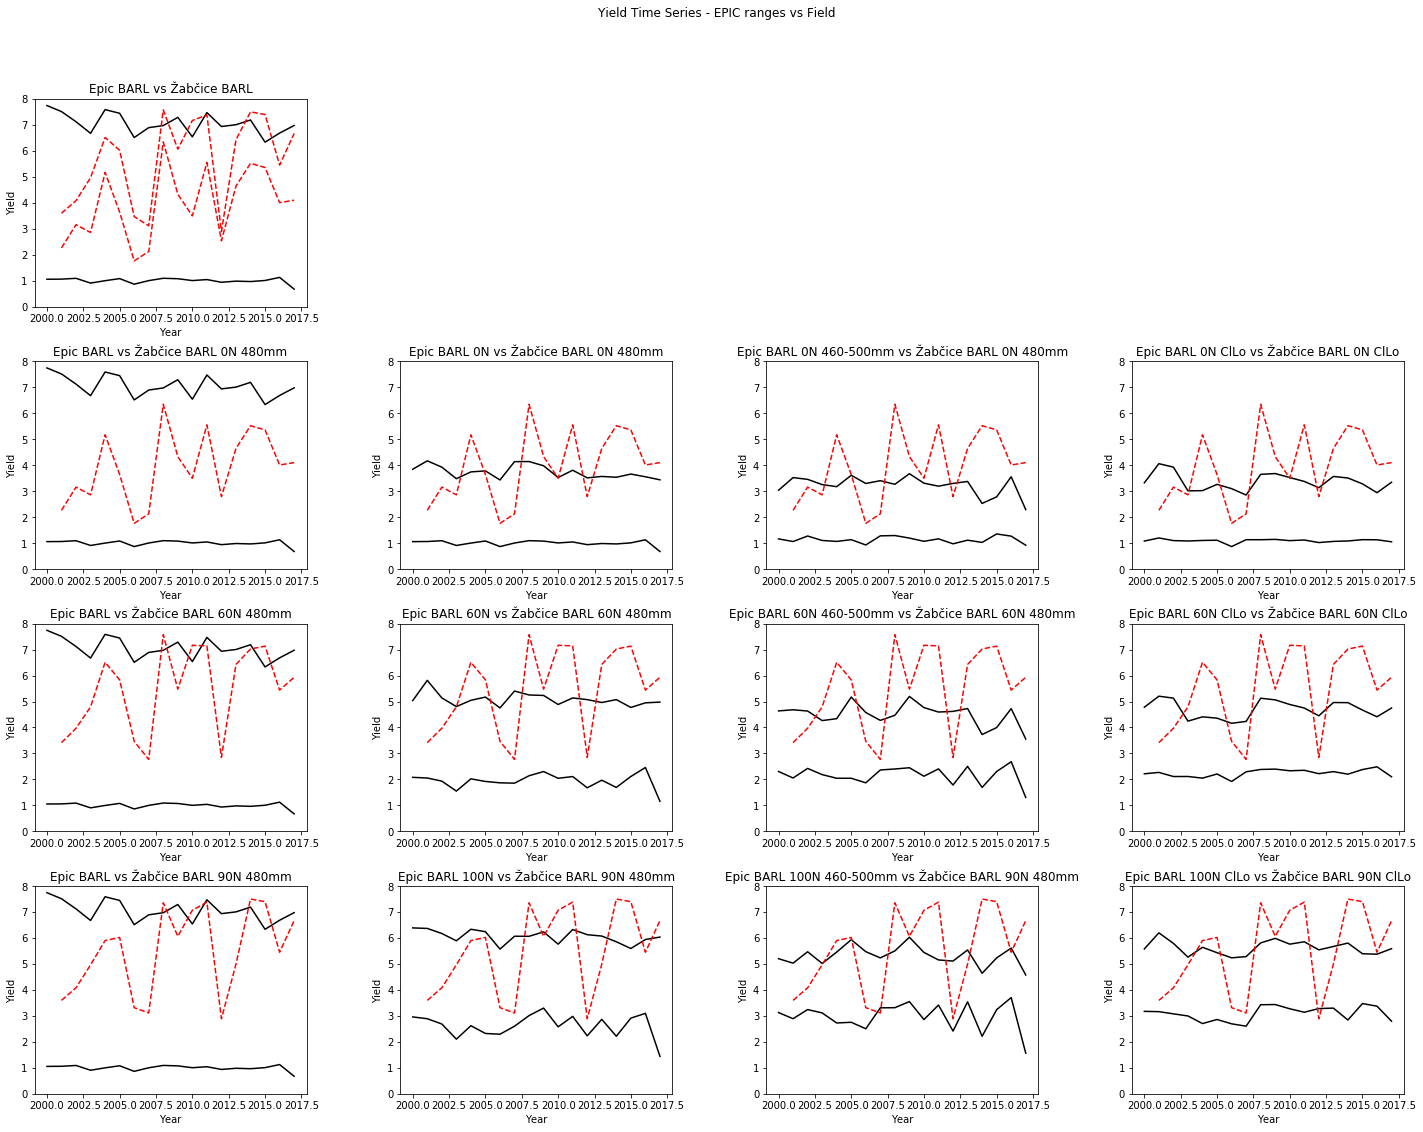

In [111]:
# plot time series of data - filtered and unfiltered 

x_coords = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Yield Time Series - EPIC ranges vs Field')

ax0 = fig.add_subplot(4,4,1)
ax1 = fig.add_subplot(4,4,2)
ax2 = fig.add_subplot(4,4,3)
ax12 = fig.add_subplot(4,4,4)
ax3 = fig.add_subplot(4,4,5)
ax4 = fig.add_subplot(4,4,6)
ax5 = fig.add_subplot(4,4,7)
ax13 = fig.add_subplot(4,4,8)
ax6 = fig.add_subplot(4,4,9)
ax7 = fig.add_subplot(4,4,10)
ax8 = fig.add_subplot(4,4,11)
ax14 = fig.add_subplot(4,4,12)
ax9 = fig.add_subplot(4,4,13)
ax10 = fig.add_subplot(4,4,14)
ax11 = fig.add_subplot(4,4,15)
ax15 = fig.add_subplot(4,4,16)


# set titles
ax0.set_title('Epic BARL vs Žabčice BARL')
ax3.set_title('Epic BARL vs Žabčice BARL 0N 480mm')
ax4.set_title('Epic BARL 0N vs Žabčice BARL 0N 480mm')
ax5.set_title('Epic BARL 0N 460-500mm vs Žabčice BARL 0N 480mm')
ax13.set_title('Epic BARL 0N ClLo vs Žabčice BARL 0N ClLo')

ax6.set_title('Epic BARL vs Žabčice BARL 60N 480mm')
ax7.set_title('Epic BARL 60N vs Žabčice BARL 60N 480mm')
ax8.set_title('Epic BARL 60N 460-500mm vs Žabčice BARL 60N 480mm')
ax14.set_title('Epic BARL 60N ClLo vs Žabčice BARL 60N ClLo')

ax9.set_title('Epic BARL vs Žabčice BARL 90N 480mm')
ax10.set_title('Epic BARL 100N vs Žabčice BARL 90N 480mm')
ax11.set_title('Epic BARL 100N 460-500mm vs Žabčice BARL 90N 480mm')
ax15.set_title('Epic BARL 100N ClLo vs Žabčice BARL 90N ClLo')

# epic bounds
ax0.plot(x_coords, epic_CROP_yldg_mins, color = "black")
ax0.plot(x_coords, epic_CROP_yldg_maxs, color = "black")

ax1.axis('off')
ax2.axis('off')
ax12.axis('off')

ax3.plot(x_coords, epic_CROP_yldg_mins, color = "black")
ax3.plot(x_coords, epic_CROP_yldg_maxs, color = "black")

ax4.plot(x_coords, epic_CROP_0nfert_yldg_mins, color = "black")
ax4.plot(x_coords, epic_CROP_0nfert_yldg_maxs, color = "black")

ax5.plot(x_coords, epic_CROP_0nfert_ppt_yldg_mins, color = "black")
ax5.plot(x_coords, epic_CROP_0nfert_ppt_yldg_maxs, color = "black")

ax13.plot(x_coords, epic_CROP_0nfert_tex_yldg_mins, color = "black")
ax13.plot(x_coords, epic_CROP_0nfert_tex_yldg_maxs, color = "black")

ax6.plot(x_coords, epic_CROP_yldg_mins, color = "black")
ax6.plot(x_coords, epic_CROP_yldg_maxs, color = "black")

ax7.plot(x_coords, epic_CROP_60nfert_yldg_mins, color = "black")
ax7.plot(x_coords, epic_CROP_60nfert_yldg_maxs, color = "black")

ax8.plot(x_coords, epic_CROP_60nfert_ppt_yldg_mins, color = "black")
ax8.plot(x_coords, epic_CROP_60nfert_ppt_yldg_maxs, color = "black")

ax14.plot(x_coords, epic_CROP_60nfert_tex_yldg_mins, color = "black")
ax14.plot(x_coords, epic_CROP_60nfert_tex_yldg_maxs, color = "black")

ax9.plot(x_coords, epic_CROP_yldg_mins, color = "black")
ax9.plot(x_coords, epic_CROP_yldg_maxs, color = "black")

ax10.plot(x_coords, epic_CROP_100nfert_yldg_mins, color = "black")
ax10.plot(x_coords, epic_CROP_100nfert_yldg_maxs, color = "black")

ax11.plot(x_coords, epic_CROP_100nfert_ppt_yldg_mins, color = "black")
ax11.plot(x_coords, epic_CROP_100nfert_ppt_yldg_maxs, color = "black")

ax15.plot(x_coords, epic_CROP_100nfert_tex_yldg_mins, color = "black")
ax15.plot(x_coords, epic_CROP_100nfert_tex_yldg_maxs, color = "black")

# field data
ax0.plot(x_coords, z_barl_mins, color = "red", linestyle='dashed')
ax0.plot(x_coords, z_barl_maxs, color = "red", linestyle='dashed')

ax3.plot(x_coords, z_barl_ts_0N, color = "red", linestyle='dashed')
ax4.plot(x_coords, z_barl_ts_0N, color = "red", linestyle='dashed')
ax5.plot(x_coords, z_barl_ts_0N, color = "red", linestyle='dashed')
ax13.plot(x_coords, z_barl_ts_0N, color = "red", linestyle='dashed')

ax6.plot(x_coords, z_barl_ts_60N, color = "red", linestyle='dashed')
ax7.plot(x_coords, z_barl_ts_60N, color = "red", linestyle='dashed')
ax8.plot(x_coords, z_barl_ts_60N, color = "red", linestyle='dashed')
ax14.plot(x_coords, z_barl_ts_60N, color = "red", linestyle='dashed')

ax9.plot(x_coords, z_barl_ts_90N, color = "red", linestyle='dashed')
ax10.plot(x_coords, z_barl_ts_90N, color = "red", linestyle='dashed')
ax11.plot(x_coords, z_barl_ts_90N, color = "red", linestyle='dashed')
ax15.plot(x_coords, z_barl_ts_90N, color = "red", linestyle='dashed')


#set labels 
ax0.set_xlabel('Year')
ax0.set_ylabel('Yield')

ax3.set_ylabel('Yield')
ax3.set_xlabel('Year')
ax4.set_xlabel('Year')
ax4.set_ylabel('Yield')
ax5.set_xlabel('Year')
ax5.set_ylabel('Yield')
ax13.set_xlabel('Year')
ax13.set_ylabel('Yield')

ax6.set_ylabel('Yield')
ax6.set_xlabel('Year')
ax7.set_xlabel('Year')
ax7.set_ylabel('Yield')
ax8.set_xlabel('Year')
ax8.set_ylabel('Yield')
ax14.set_xlabel('Year')
ax14.set_ylabel('Yield')

ax9.set_ylabel('Yield')
ax9.set_xlabel('Year')
ax10.set_xlabel('Year')
ax10.set_ylabel('Yield')
ax11.set_xlabel('Year')
ax11.set_ylabel('Yield')
ax15.set_xlabel('Year')
ax15.set_ylabel('Yield')

ax0.set_ylim([0, 8])
ax1.set_ylim([0, 8])
ax2.set_ylim([0, 8])
ax3.set_ylim([0, 8])
ax4.set_ylim([0, 8])
ax5.set_ylim([0, 8])
ax6.set_ylim([0, 8])
ax7.set_ylim([0, 8])
ax8.set_ylim([0, 8])
ax9.set_ylim([0, 8])
ax10.set_ylim([0, 8])
ax11.set_ylim([0, 8])
ax13.set_ylim([0, 8])
ax14.set_ylim([0, 8])
ax15.set_ylim([0, 8])
fig.tight_layout()

fig.subplots_adjust(top=0.90)

plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\time_series_Žabčice_BARL_to_epic.jpg")

In [237]:
# just yields for the one record
z_1_yield = z[['2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018']].iloc[3].to_numpy()


In [238]:
# remove nan values
x = z_1_yield[~np.isnan(z_1_yield)]

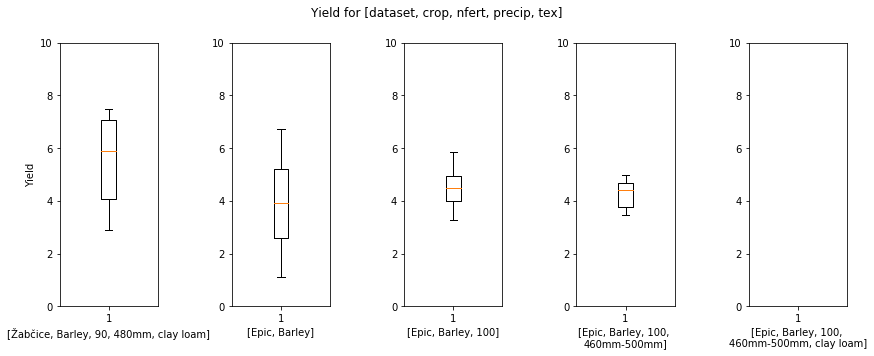

In [236]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Yield for [dataset, crop, nfert, precip, tex]')

ax0 = fig.add_subplot(1,5,1)
ax1 = fig.add_subplot(1,5,2)
ax2 = fig.add_subplot(1,5,3)
ax3 = fig.add_subplot(1,5,4)
ax4 = fig.add_subplot(1,5,5)

ax0.boxplot(x)
ax1.boxplot(epic_CROP_yldg)
ax2.boxplot(epic_CROP_nfert_yldg)
ax3.boxplot(epic_CROP_nfert_precip_yldg)
ax4.boxplot(epic_CROP_nfert_precip_tex_yld)


ax0.set_xlabel('[Žabčice, Barley, 90, 480mm, clay loam]')
ax0.set_ylabel('Yield')

ax1.set_xlabel('[Epic, Barley]')
ax2.set_xlabel('[Epic, Barley, 100]')
ax3.set_xlabel('[Epic, Barley, 100, \n460mm-500mm]')
ax4.set_xlabel('[Epic, Barley, 100, \n460mm-500mm, clay loam]')

ax0.set_ylim([0, 10])
ax1.set_ylim([0, 10])
ax2.set_ylim([0, 10])
ax3.set_ylim([0, 10])
ax4.set_ylim([0, 10])

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\boxplot_Žabčice3_to_epic.jpg")

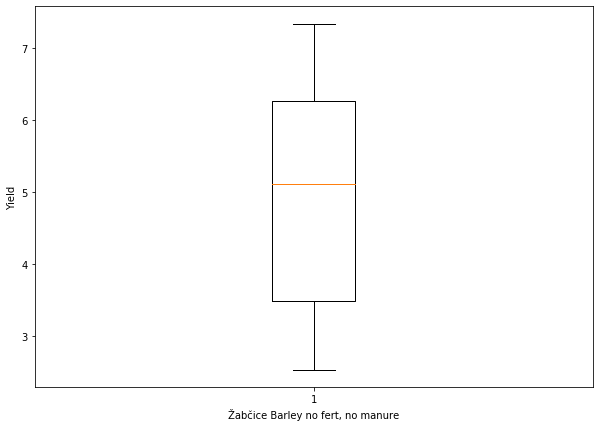

<Figure size 432x288 with 0 Axes>

In [94]:
# boxplot for one record 
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(x)
plt.ylabel("Yield")
plt.xlabel("Žabčice Barley no fert, no manure")
# show plot
plt.show()
plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\code\\boxplot_Žabčice_BARL_0NFERT_0MANURE.jpg")

In [56]:
# compare mean at one cite x one crop to epic one crop
boxplotz = z.boxplot(column=['mean_YLDG'], by = 'CROP', figsize = (7,5))


Index(['Unnamed: 0', 'Site', 'CROP', 'Experiment', 'Treatment ', 'NFERT',
       'manure', 'Reported yield data (t DM/ha)', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', 'mean_YLDG',
       'min_YLDG', 'max_YLDG', 'Prec (mm)', 'Soil texture', 'Sand', 'Silt',
       'Clay'],
      dtype='object')

### Generating Histgrams

In [147]:
# function to generate histograms
def hist(data, title):
    plt.hist(data, bins=20)
    plt.xlabel('yield')
    plt.title(title)
    save_fig = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\histograms\\" + title + ".jpg"
    plt.savefig(save_fig)
    plt.close()

In [153]:
# create list of all histograms to generate and the data that goes with it for epic
titles_epic = ['full_epic_yield_histogram', 'BARL_epic_histogram', 'C100_epic_histogram', 
          'C150_epic_histogram', 'C180_epic_histogram', 'WWHT_epic_histogram', 
         'BARL_N_fert_over_60_epic_histogram', 'C100_N_fert_over_60_epic_his_ogram', 
          'C150_N_fert_over_60_epic_histogram', 'C180_N_fert_over_60_epic_histogram', 'WWHT_N_fert_over_60_epic_histogram',
         'BARL_N_fert_leq_60_epic_histogram', 'C100_N_fert_leq_60_epic_histogram', 
          'C150_N_fert_leq_60_epic_histogram', 'C180_N_fert_leq_60_epic_histogram', 'WWHT_N_fert_leq_60_epic_histogram']

data_sets_epic = [epic['mean_YLDG'], epic[epic['CROP'] == 'BARL']['mean_YLDG'], epic[epic['CROP'] == 'C100']['mean_YLDG'],
            epic[epic['CROP'] == 'C150']['mean_YLDG'], epic[epic['CROP'] == 'C180']['mean_YLDG'], epic[epic['CROP'] == 'WWHT']['mean_YLDG'],
            
            epic[(epic['CROP'] == 'BARL') & (epic['mean_NFERT'] > 60)]['mean_YLDG'], epic[(epic['CROP'] == 'C100') & (epic['mean_NFERT'] > 60)]['mean_YLDG'],
            epic[(epic['CROP'] == 'C150') & (epic['mean_NFERT'] > 60)]['mean_YLDG'], epic[(epic['CROP'] == 'C180') & (epic['mean_NFERT'] > 60)]['mean_YLDG'], epic[(epic['CROP'] == 'WWHT') & (epic['mean_NFERT'] > 60)]['mean_YLDG'],
            
            epic[(epic['CROP'] == 'BARL') & (epic['mean_NFERT'] <= 60)]['mean_YLDG'], epic[(epic['CROP'] == 'C100') & (epic['mean_NFERT'] <= 60)]['mean_YLDG'],
            epic[(epic['CROP'] == 'C150') & (epic['mean_NFERT'] <= 60)]['mean_YLDG'], epic[(epic['CROP'] == 'C180') & (epic['mean_NFERT'] <= 60)]['mean_YLDG'], epic[(epic['CROP'] == 'WWHT') & (epic['mean_NFERT'] <= 60)]['mean_YLDG']]
             
# # create list of all histograms to generate and the data that goes with it for field data
titles_field = ['full_field_yield_histogram', 'BARL_field_histogram', 'C100_field_histogram', 
          'C150_field_histogram', 'C180_field_histogram', 'WWHT_field_histogram', 
        
                'BARL_N_fert_over_60_field_histogram', 'C100_N_fert_over_60_field_histogram', 
          'C150_N_fert_over_60_field_histogram', 'C180_N_fert_over_60_field_histogram', 'WWHT_N_fert_over_60_field_histogram',
        
                'BARL_N_fert_leq_60_field_histogram', 'C100_N_fert_leq_60_field_histogram', 
          'C150_N_fert_leq_60_field_histogram', 'C180_N_fert_leq_60_field_histogram', 'WWHT_N_fert_leq_60_field_histogram', 
               
                'BARL_manure_over_10_field_histogram', 'C100_manure_over_10_field_histogram', 
          'C150_manure_over_10_field_histogram', 'C180_manure_over_10_field_histogram', 'WWHT_manure_over_10_field_histogram',
               
                'BARL_manur_leq_10_field_histogram', 'C100_manure_leq_10_field_histogram', 
          'C150_manure_leq_10_field_histogram', 'C180_manure_leq_10_field_histogram', 'WWHT_manure_leq_10_field_histogram',]
                  
data_sets_field = [site_data['mean_YLDG'], site_data[site_data['CROP'] == 'BARL']['mean_YLDG'], site_data[site_data['CROP'] == 'C100']['mean_YLDG'],
            site_data[site_data['CROP'] == 'C150']['mean_YLDG'], site_data[site_data['CROP'] == 'C180']['mean_YLDG'], site_data[site_data['CROP'] == 'WWHT']['mean_YLDG'],
            
            site_data[(site_data['CROP'] == 'BARL') & (site_data['NFERT'] > 60)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C100') & (site_data['NFERT'] > 60)]['mean_YLDG'],
            site_data[(site_data['CROP'] == 'C150') & (site_data['NFERT'] > 60)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C180') & (site_data['NFERT'] > 60)]['mean_YLDG'], site_data[(site_data['CROP'] == 'WWHT') & (site_data['NFERT'] > 60)]['mean_YLDG'],
            
            site_data[(site_data['CROP'] == 'BARL') & (site_data['NFERT'] <= 60)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C100') & (site_data['NFERT'] <= 60)]['mean_YLDG'],
            site_data[(site_data['CROP'] == 'C150') & (site_data['NFERT'] <= 60)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C180') & (site_data['NFERT'] <= 60)]['mean_YLDG'], site_data[(site_data['CROP'] == 'WWHT') & (site_data['NFERT'] <= 60)]['mean_YLDG'],
            
            site_data[(site_data['CROP'] == 'BARL') & (site_data['manure'] > 10)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C100') & (site_data['manure'] > 10)]['mean_YLDG'],
            site_data[(site_data['CROP'] == 'C150') & (site_data['manure'] > 10)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C180') & (site_data['manure'] > 10)]['mean_YLDG'], site_data[(site_data['CROP'] == 'WWHT') & (site_data['manure'] > 10)]['mean_YLDG'],
            
            site_data[(site_data['CROP'] == 'BARL') & (site_data['manure'] <= 1)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C100') & (site_data['manure'] <= 10)]['mean_YLDG'],
            site_data[(site_data['CROP'] == 'C150') & (site_data['manure'] <= 1)]['mean_YLDG'], site_data[(site_data['CROP'] == 'C180') & (site_data['manure'] <= 10)]['mean_YLDG'], site_data[(site_data['CROP'] == 'WWHT') & (site_data['manure'] <= 10)]['mean_YLDG']]



In [159]:
site_data['CROP'].unique()

array(['WWHT', 'BARL', 'C100', 'C180'], dtype=object)

In [155]:
# run through the lists above and save the output histograms 
for title, data in zip(titles_epic, data_sets_epic): 
    hist(data, title)
    
for title, data in zip(titles_field, data_sets_field): 
    hist(data, title)

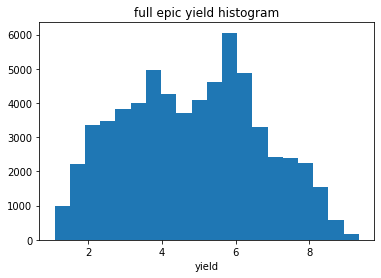

In [91]:
hist(epic['mean_YLDG'], 'full epic yield histogram')

## Site Data 
### Test to see if hand-filtering gets closer to actual site data min, max, and mean yield 

In [71]:
# SUMMARY STATISTICS FUNCTION FOR SITE DATA
# DO NOT CHANGE

# having a hard time with this since we have summarized over multiple years per site 
# min is the min(minimum of 2000-2018 yields)
def variable_values_site(data_frame): 
    print ("Summary statistics: \n")
    print ("Max: ", data_frame['max_yield'].max())
    print ("Min: ", data_frame['min_yield'].min())
    print ("Mean: ", data_frame['Mean'].mean())
#     print ("Stdv: ", data_frame[variable].std())
#     print ("25th percentile: ", data_frame[variable].quantile(.25))
#     print ("75th percentile: ", data_frame[variable].quantile(.75))

    return (data_frame['max_yield'].max(), data_frame['min_yield'].min(), data_frame['Mean'].mean())

In [80]:
# TEST ACCURACY OF EPIC FILTER VS SITE FILTER
def filter_accuracy(site_subset, epic_subset): 
    print ("Summary statistics for site subset: \n")
    print ("Max: ", site_subset['max_yield'].max())
    print ("Min: ", site_subset['min_yield'].min())
    print ("Mean: ", site_subset['Mean'].mean())
    
    print ("\n Summary statistics for epic subset: \n")
    print ("Max: ", epic_subset['YLDG'].max())
    print ("Min: ", epic_subset['YLDG'].min())
    print ("Mean: ", epic_subset['YLDG'].mean())
    
    print ("\n Difference: \n")
    print ("Difference of Max: ", np.absolute(site_subset['max_yield'].max() - epic_subset['YLDG'].max()))
    print ("Difference of Min: ", np.absolute(site_subset['min_yield'].min() - epic_subset['YLDG'].min()))
    print ("Difference of Mean: ", np.absolute(site_subset['Mean'].mean() - epic_subset['YLDG'].mean()))

In [ ]:
# How much does filtering by crop narrow the window of accuracy? 
site_WWHT_lowN = site_WWHT[site_WWHT['Crop'] == 'WWHT']
site_BARL_lowN = site_BARL[site_BARL['Crop'] == 'BARL']
site_C100_lowN = site_C100[site_C100['Crop'] == 'C100']
site_C180_lowN = site_C180[site_C180['Crop'] == 'C180']

WWHT_lowN = df[df['CROP'] == 'WWHT']
BARL_lowN = df[df['CROP'] == 'BARL']
C100_lowN = df[df['CROP'] == 'C100']
C180_lowN = df[df['CROP'] == 'C180']

# WWHT differences 
print('wheat differences \n')
filter_accuracy(site_WWHT, WWHT)

# BARL differences 
print('\n barley differences \n')
filter_accuracy(site_BARL, BARL)

# C100 differences 
print('\n C100 differences \n')
filter_accuracy(site_C100, C100)

# C180 differences 
print('\n C180 differences \n')
filter_accuracy(site_C180, C180)

In [81]:
# How much does filtering by crop + nfert narrow the window of accuracy? 
site_WWHT_highN = site_WWHT[site_WWHT['Mineral N kg/ha/y'] > 30]
site_BARL_highN = site_BARL[site_BARL['Mineral N kg/ha/y'] > 30]
site_C100_highN = site_C100[site_C100['Mineral N kg/ha/y'] > 30]
site_C180_highN = site_C180[site_C180['Mineral N kg/ha/y'] > 30]

WWHT_highN = WWHT[WWHT['NFERT'] > 30]
BARL_highN = BARL[BARL['NFERT'] > 30]
C100_highN = C100[C100['NFERT'] > 30]
C180_highN = C180[C180['NFERT'] > 30]

# WWHT differences 
print('wheat + N>30 differences \n')
filter_accuracy(site_WWHT_highN, WWHT_highN)

# BARL differences 
print('\n barley + N>30 differences \n')
filter_accuracy(site_BARL_highN, BARL_highN)

# C100 differences 
print('\n C100 + N>30 differences \n')
filter_accuracy(site_C100_highN, C100_highN)

# C180 differences 
print('\n C180 + N>30 differences \n')
filter_accuracy(site_C180_highN, C180_highN)

wheat + N>30 differences 

Summary statistics for site subset: 

Max:  14.2072
Min:  0.935
Mean:  6.444959680061722

 Summary statistics for epic subset: 

Max:  8.937999999999999
Min:  1.124
Mean:  4.690011728506927

 Difference: 

Difference of Max:  5.269200000000001
Difference of Min:  0.18900000000000006
Difference of Mean:  1.7549479515547954

 barley + N>30 differences 

Summary statistics for site subset: 

Max:  11.5756
Min:  0.903
Mean:  4.413830813388339

 Summary statistics for epic subset: 

Max:  8.445
Min:  1.159
Mean:  4.531382276810779

 Difference: 

Difference of Max:  3.1305999999999994
Difference of Min:  0.256
Difference of Mean:  0.1175514634224406

 C100 + N>30 differences 

Summary statistics for site subset: 

Max:  13.631
Min:  2.6144
Mean:  7.867280000000001

 Summary statistics for epic subset: 

Max:  9.26
Min:  1.5290000000000001
Mean:  5.467835539037861

 Difference: 

Difference of Max:  4.371
Difference of Min:  1.0853999999999997
Difference of Mean:  

In [82]:
# How much does filtering by crop + nfert narrow the window of accuracy? 
site_WWHT_lowN = site_WWHT[site_WWHT['Mineral N kg/ha/y'] <= 30]
site_BARL_lowN = site_BARL[site_BARL['Mineral N kg/ha/y'] <= 30]
site_C100_lowN = site_C100[site_C100['Mineral N kg/ha/y'] <= 30]
site_C180_lowN = site_C180[site_C180['Mineral N kg/ha/y'] <= 30]

WWHT_lowN = WWHT[WWHT['NFERT'] <= 30]
BARL_lowN = BARL[BARL['NFERT'] <= 30]
C100_lowN = C100[C100['NFERT'] <= 30]
C180_lowN = C180[C180['NFERT'] <= 30]

# WWHT differences 
print('wheat + N<=30 differences \n')
filter_accuracy(site_WWHT_lowN, WWHT_lowN)

# BARL differences 
print('\n barley + N<=30 differences \n')
filter_accuracy(site_BARL_lowN, BARL_lowN)

# C100 differences 
print('\n C100 + N<=30 differences \n')
filter_accuracy(site_C100_lowN, C100_lowN)

# C180 differences 
print('\n C180 + N<=30 differences \n')
filter_accuracy(site_C180_lowN, C180_lowN)

wheat + N<=30 differences 

Summary statistics for site subset: 

Max:  14.3534
Min:  1.0148
Mean:  4.462312312411539

 Summary statistics for epic subset: 

Max:  6.211
Min:  0.479
Mean:  1.9222669809040396

 Difference: 

Difference of Max:  8.1424
Difference of Min:  0.5357999999999999
Difference of Mean:  2.5400453315075

 barley + N<=30 differences 

Summary statistics for site subset: 

Max:  7.964499999999999
Min:  0.4386
Mean:  2.7838399965059675

 Summary statistics for epic subset: 

Max:  5.645
Min:  0.674
Mean:  2.01244874002899

 Difference: 

Difference of Max:  2.3194999999999997
Difference of Min:  0.23540000000000005
Difference of Mean:  0.7713912564769774

 C100 + N<=30 differences 

Summary statistics for site subset: 

Max:  12.2292
Min:  2.8895999999999997
Mean:  6.76304

 Summary statistics for epic subset: 

Max:  6.9
Min:  1.088
Mean:  2.7850072063088933

 Difference: 

Difference of Max:  5.3292
Difference of Min:  1.8015999999999996
Difference of Mean:  3.9780

### Exploratory Decsion Tree Building

In [8]:
# dataframes split by crop type 
# these are smaller dataframes which are crop-specific ( i.e. a dataframe with only wheat runs in it )
WWHT = df[df['CROP'] == 'WWHT']
BARL = df[df['CROP'] == 'BARL']
C100 = df[df['CROP'] == 'C100']
C150 = df[df['CROP'] == 'C150']
C180 = df[df['CROP'] == 'C180']

In [9]:
# label encoder to make categorical data numerical categories
# Decision tree cannot handle string data, so convert the crop types to numbers to build a decision tree with these as variables

le = preprocessing.LabelEncoder()
le.fit(['WWHT', 'BARL', 'C100', 'C150', 'C180'])
df['CROP'] = le.transform(np.array(df['CROP'])) 

In [137]:
# dataframes split by fertilizer 
N15 = df[df['NFERT'] == 15]
N60 = df[df['NFERT'] == 60]
N100 = df[df['NFERT'] == 100]
N250 = df[df['NFERT'] == 250]

In [138]:
# list of dataframe subsets 
# USE THESE SUBSETS TO ITERATE OVER A GENERAL FUNCTION FOR EXPLORING DECISION TREES
crop_subsets = [WWHT, BARL, C100, C150, C180]
fert_subsets = [N15, N60, N100, N250]

In [139]:
# attributes to go into the decision tree
attr = ['CROP', 'NFERT', 'BALER', 'OCPD', 'TAP', 'SAND', 'SILT',
       'CLAY','PH', 'PRCP']

# attributes for crop specific dataframe - "CROP" variable removed since it is not relevant in crop-specific dataframes 
attrC = ['NFERT', 'BALER', 'OCPD', 'TAP', 'SAND', 'SILT',
       'CLAY','PH', 'PRCP' ]

# attributes for fertilizer specific dataframe - "CROP" variable removed since it is not relevant in fert-specific dataframes 
attrF = ['CROP', 'BALER', 'OCPD', 'TAP', 'SAND', 'SILT',
       'CLAY','PH', 'PRCP' ]

# target variable - grain yield, can also be forage yield "YLDF"
target = ['YLDG']

In [140]:
# split FULL dataframe into X and y variables
X = df[attr]
y = df[target]

In [141]:
# split into train (70%) and test+valid sets (30%), with shuffling and random state set 
X_train, X_testvalid, y_train, y_testvalid = train_test_split(X, y, test_size=0.30, random_state=42)

# split test+valid into test (10%) and validation (20%) sets, with shuffling and random state set 
X_valid, X_test, y_valid, y_test = train_test_split(X_testvalid, y_testvalid, test_size=(1/3), random_state=42)

In [142]:
# build a decision tree and cross validate 10 times 
# chose the best random split - splitter = 'random'
# maximum depth = 5 - THIS CAN BE CHANGED TO BUILD A DEEPER, MORE ACCURATE TREE

regressor = DecisionTreeRegressor(splitter = "random", max_depth = 5)
print ("CROSS VALIDATION SCORES: ", cross_val_score(regressor, X_train, y_train, cv=10))
dtree = regressor.fit(X_train, y_train)

CROSS VALIDATION SCORES:  [0.73305054 0.77614494 0.80733795 0.76153239 0.76353184 0.75268324
 0.7501028  0.75408891 0.76645327 0.77844429]


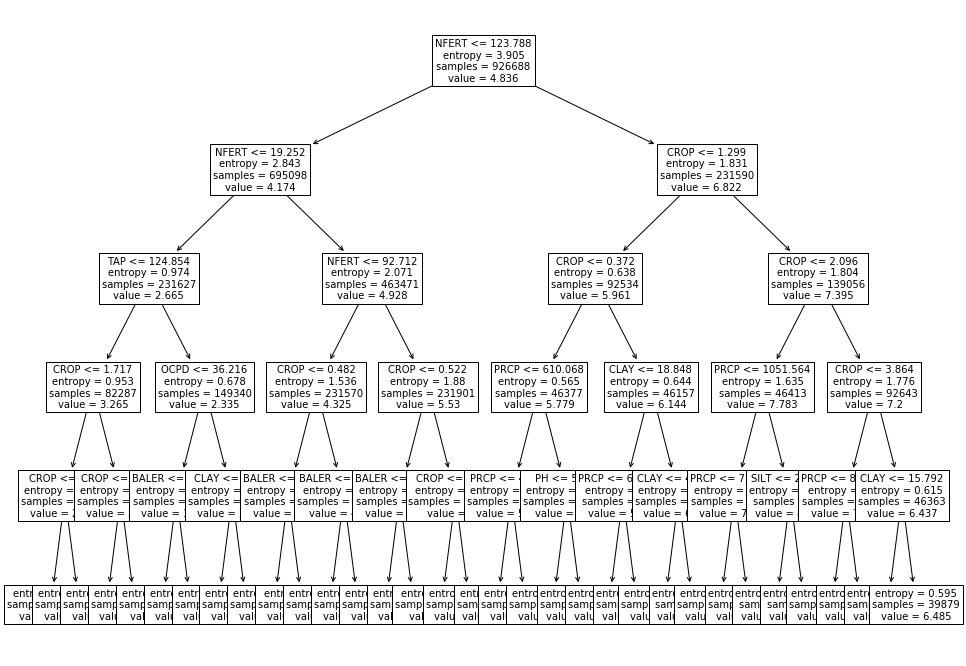

In [143]:
plt.figure(figsize=(16,12))  # set plot size (denoted in inches)
tree.plot_tree(dtree, feature_names = X.columns, fontsize = 10)
plt.show()

# IF YOU WANT TO SAVE THIS DECISION TREE AS A FIGURE - SPECIFY A PATH TO THE LOCATION YOU WANT IT AND A NAME
# plt.savefig("C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\decision_tree.png")

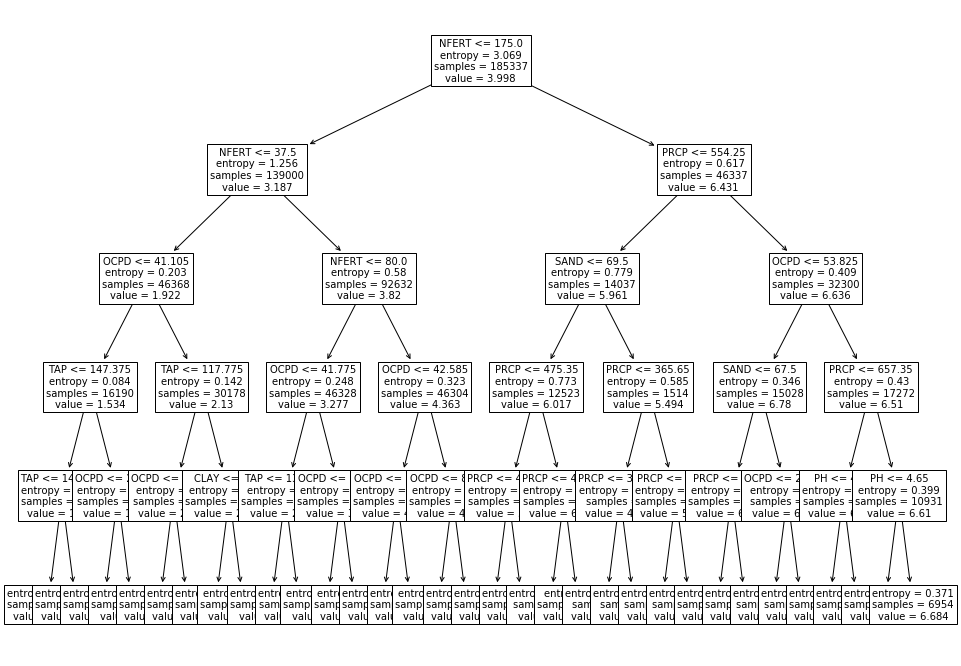

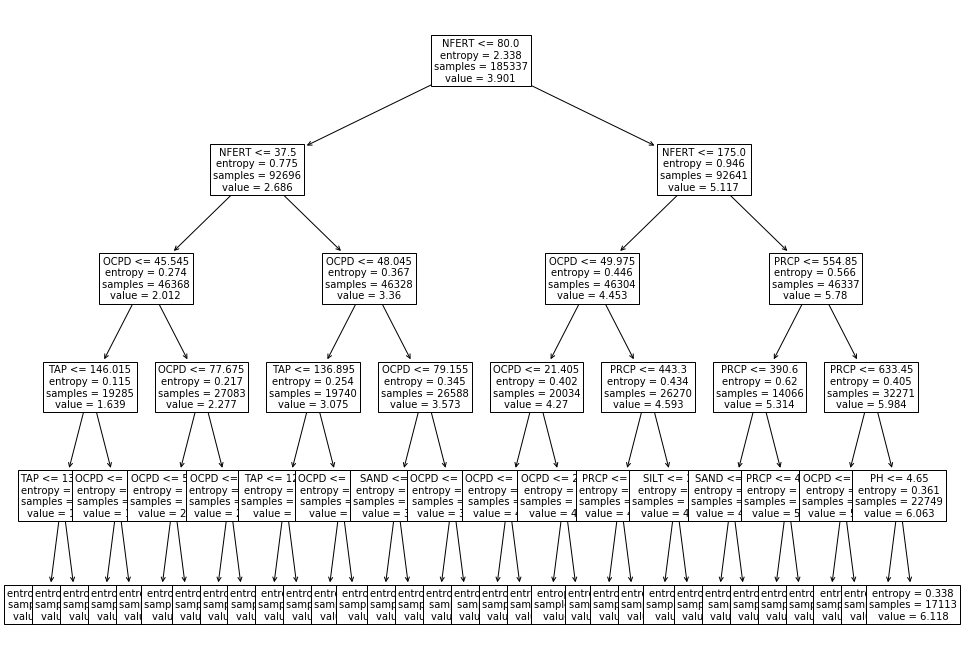

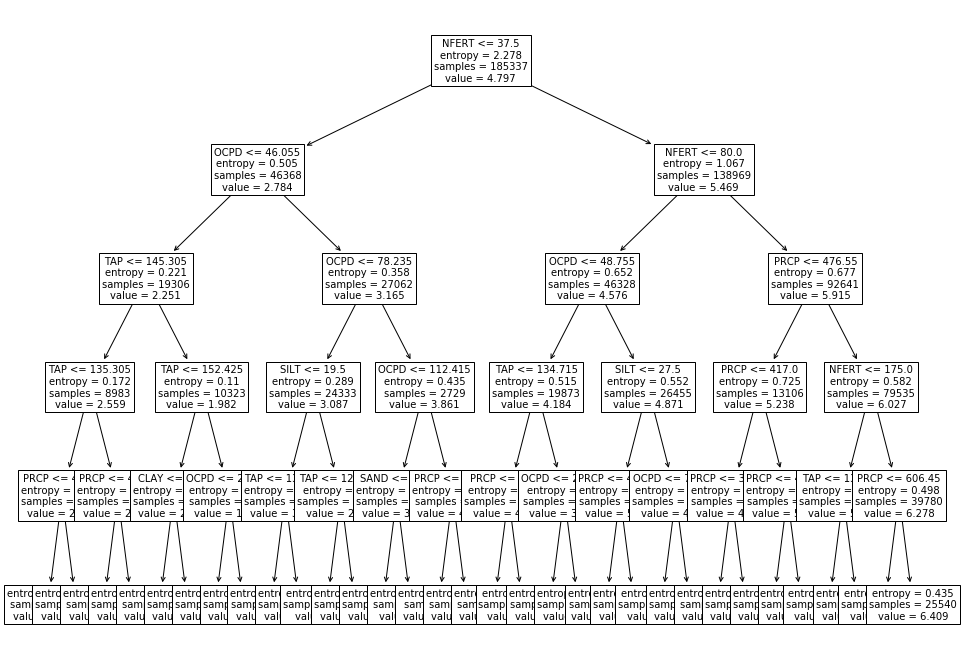

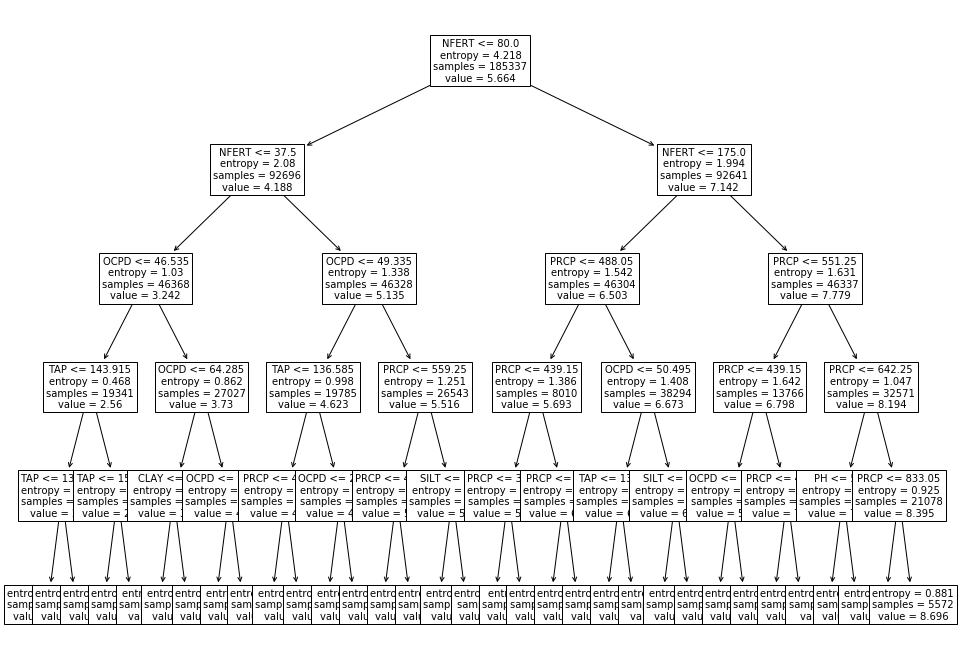

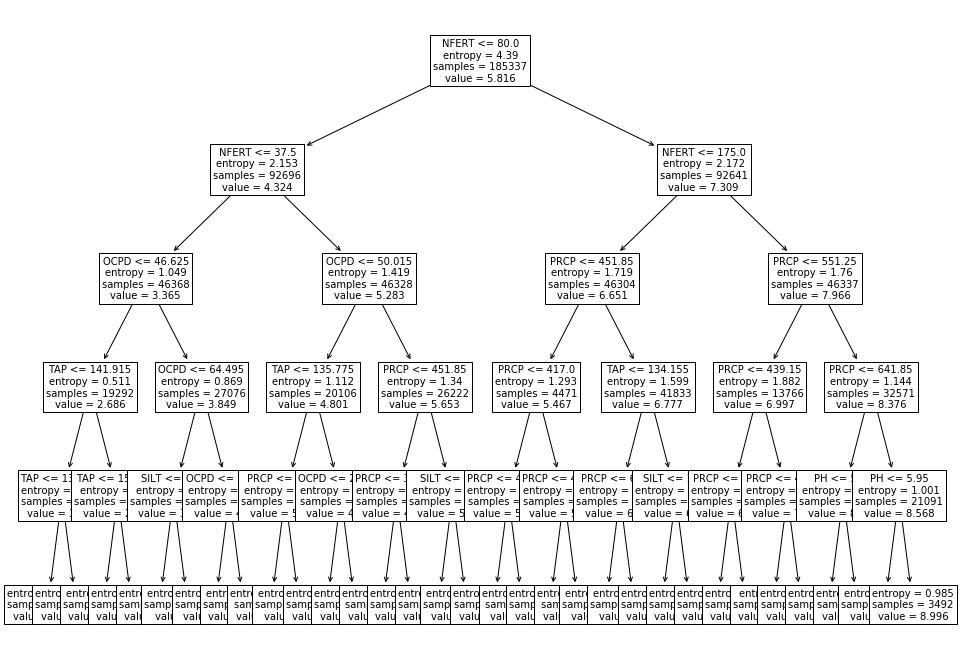

In [73]:
# THIS CODE WILL BUILD DECISION TREES FOR EACH CROP-SPECIFIC DATAFRAME 

# CHANGE THIS PATH TO WHERE YOU WANT FIGURES TO BE SAVED 
path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\preliminary_Dtrees\\"


# DO NOT CHANGE BELOW THIS LINE 
#---------------------------------------------------------------------------------------------------------------------------#

# split by crop and then build decision trees for each crop 
R_2_cropsubsets = dict()
labels = ['WWHT', 'BARL', 'C100', 'C150', 'C180']
i = 0
    
for subset in crop_subsets: 
    # pull attributes from dataset 
    X = subset[attrC]
    y = subset['YLDG']
    
    # split into train (70%) and test+valid sets (30%), with shuffling and random state set 
    X_train, X_testvalid, y_train, y_testvalid = train_test_split(X, y, test_size=0.30, random_state=42)

    # split test+valid into test (10%) and validation (20%) sets, with shuffling and random state set 
    X_valid, X_test, y_valid, y_test = train_test_split(X_testvalid, y_testvalid, test_size=(1/3), random_state=42)
    
#     regressor = DecisionTreeRegressor(splitter = "random", max_depth = 5)
    regressor = DecisionTreeRegressor(max_depth = 5)
    R_2_cropsubsets[labels[i]] = (cross_val_score(regressor, X_train, y_train, cv=10))
    dtree = regressor.fit(X_train, y_train)
    
    
    fig_path = path + labels[i] + ".png"
    plt.figure(figsize=(16,12))  # set plot size (denoted in inches)
    tree.plot_tree(dtree, feature_names = X.columns, fontsize = 10)
    plt.savefig(fig_path)
    plt.show()
    
    i+=1 

In [ ]:
# R SQUARED VALUE OF EACH FERTILIZER SPECIFC DECISION TREE

R_2_cropsubsets

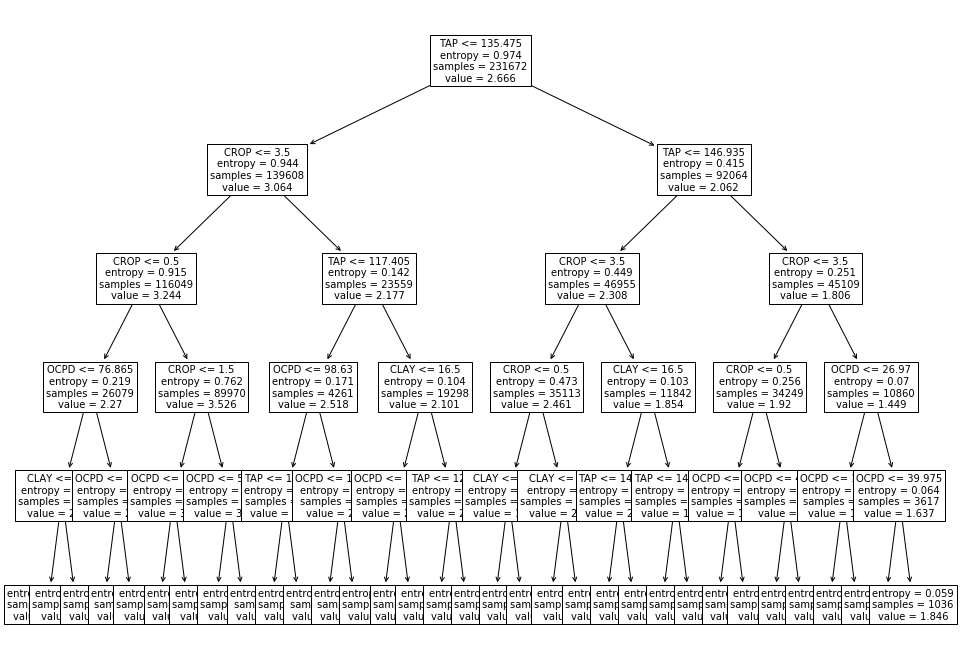

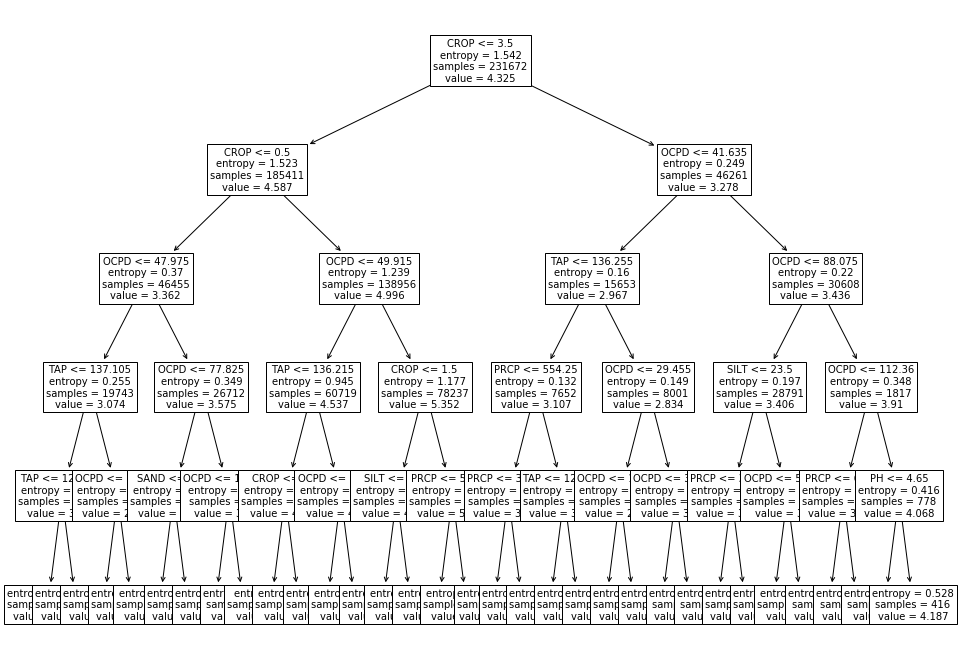

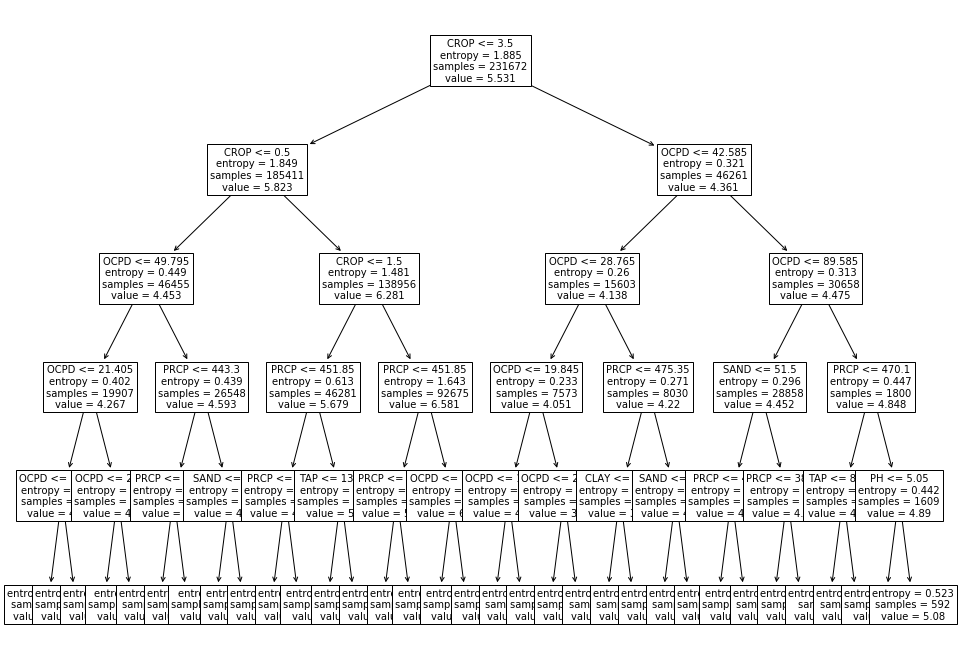

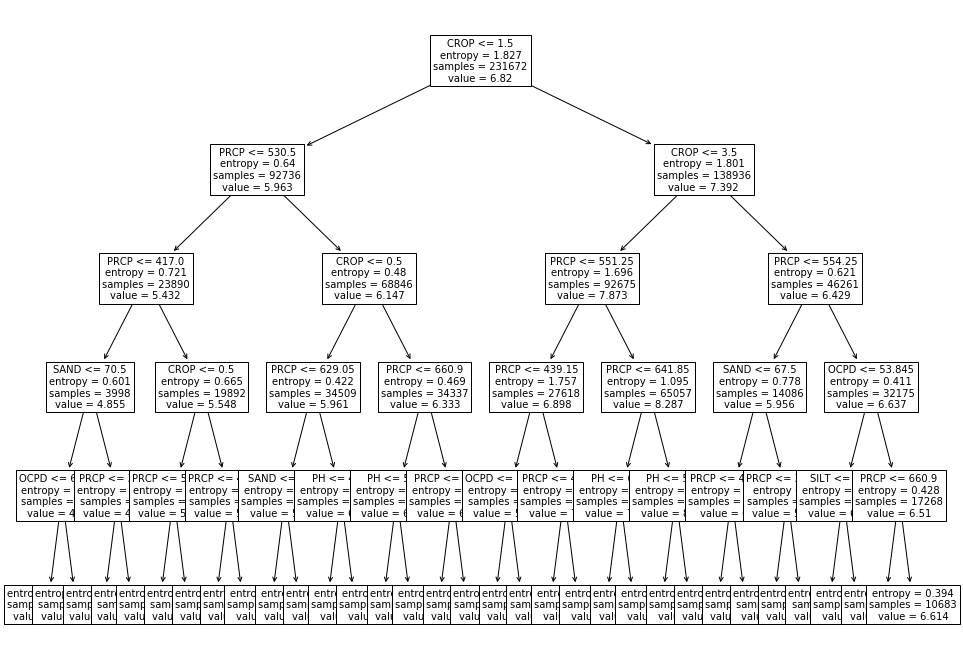

In [74]:
# THIS CODE WILL BUILD DECISION TREES FOR EACH FERTILIZER-SPECIFIC DATAFRAME 

# CHANGE THIS PATH TO WHERE YOU WANT FIGURES TO BE SAVED 
path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\preliminary_Dtrees\\"


# DO NOT CHANGE BELOW THIS LINE 
#---------------------------------------------------------------------------------------------------------------------------#


# split by fertilizer and then build decision trees for each fertilizer value 
R_2_fertsubsets = dict()
labels = ['N15', 'N60', 'N100', 'N250']
i = 0

for subset in fert_subsets: 
    # pull attributes from dataset 
    X = subset[attrF]
    y = subset['YLDG']
    
    # split into train (70%) and test+valid sets (30%), with shuffling and random state set 
    X_train, X_testvalid, y_train, y_testvalid = train_test_split(X, y, test_size=0.30, random_state=42)

    # split test+valid into test (10%) and validation (20%) sets, with shuffling and random state set 
    X_valid, X_test, y_valid, y_test = train_test_split(X_testvalid, y_testvalid, test_size=(1/3), random_state=42)
    
#     regressor = DecisionTreeRegressor(splitter = "random", max_depth = 5)
    regressor = DecisionTreeRegressor(max_depth = 5)

    R_2_fertsubsets[labels[i]] = (cross_val_score(regressor, X_train, y_train, cv=10))
    dtree = regressor.fit(X_train, y_train)
    
    fig_path = path + labels[i] + ".png"
    plt.figure(figsize=(16,12))  # set plot size (denoted in inches)
    tree.plot_tree(dtree, feature_names = X.columns, fontsize = 10)
    plt.savefig(fig_path)
    plt.show()
    
    i+= 1

In [75]:
# R SQUARED VALUE OF EACH FERTILIZER SPECIFC DECISION TREE

R_2_fertsubsets

{'N15': array([0.65657574, 0.65766089, 0.66021739, 0.64719894, 0.65274449,
        0.65851129, 0.65256632, 0.65362309, 0.65134972, 0.65903292]),
 'N60': array([0.58562038, 0.58297066, 0.5883584 , 0.57760133, 0.58331777,
        0.59059799, 0.58762429, 0.58682614, 0.58086426, 0.58600702]),
 'N100': array([0.56583149, 0.56605116, 0.57120815, 0.55853724, 0.56509492,
        0.57196082, 0.56880739, 0.5697843 , 0.56807682, 0.56762753]),
 'N250': array([0.59999671, 0.60474887, 0.60700901, 0.60111436, 0.60187266,
        0.60548729, 0.60303552, 0.60046538, 0.6014373 , 0.6059165 ])}

# Decision Trees built on specified data subsets

### Barley + Low Fertilizer (15)

[0.72407337 0.74356254 0.75106119 0.72389685 0.73705104 0.74493046
 0.73888124 0.73042228 0.7300232  0.74479661]


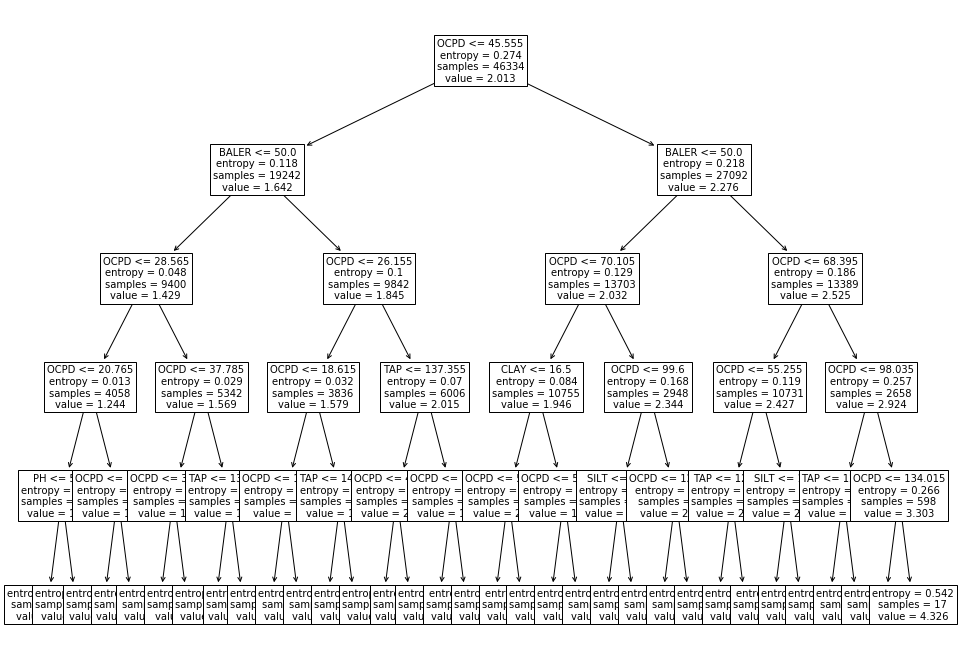

In [119]:
# take just barley with low fertilization 
low_b = BARL[BARL['NFERT'] == 15]

# attributes to use 
vars = ['BALER', 'OCPD', 'TAP', 'SAND', 'SILT',
       'CLAY','PH', 'PRCP']

# X values 
X = low_b[vars]
y = low_b['YLDG']
 # split into train (70%) and test+valid sets (30%), with shuffling and random state set 
X_train, X_testvalid, y_train, y_testvalid = train_test_split(X, y, test_size=0.30, random_state=42)

# split test+valid into test (10%) and validation (20%) sets, with shuffling and random state set 
X_valid, X_test, y_valid, y_test = train_test_split(X_testvalid, y_testvalid, test_size=(1/3), random_state=42)
    
# regressor = DecisionTreeRegressor(splitter = "random", max_depth = 5)
regressor = DecisionTreeRegressor(max_depth = 5)

print (cross_val_score(regressor, X_train, y_train, cv=10))
dtree = regressor.fit(X_train, y_train)
    
# fig_path = "C:\\Users\\Research\\Documents\\Tara_Fall_2019\\HyperCube\\preliminary_Dtrees\\Low_fert_barley_tex_ph_prcp.png"
plt.figure(figsize=(16,12))  # set plot size (denoted in inches)
tree.plot_tree(dtree, feature_names = X.columns, fontsize = 10)
# plt.savefig(fig_path)
plt.show()

### Barley + Low Fertilizer (15) + OCPD (45.55)

In [127]:
# first filter by ODPC
low_b_low_OCPD = low_b[low_b['OCPD'] <= 45.555]
low_b_high_OCPD = low_b[low_b['OCPD'] > 45.555]

print ("Barley low fertilization OCPD <45.5 Max yield: ", low_b_low_OCPD['YLDG'].max())
print ("Barley low fertilization OCPD <45.5 Min yield: ", low_b_low_OCPD['YLDG'].min())
print ("Barley low fertilization OCPD <45.5 Mean yield: ", low_b_low_OCPD['YLDG'].mean())
print ("Barley low fertilization OCPD <45.5 stdv yield: ", low_b_low_OCPD['YLDG'].std())

print ("-------------------------------------------------------------")
print ("Barley low fertilization > 45.5 Max yield: ", low_b_high_OCPD['YLDG'].max())
print ("Barley low fertilization > 45.5 Min yield: ", low_b_high_OCPD['YLDG'].min())
print ("Barley low fertilization > 45.5 Mean yield: ", low_b_high_OCPD['YLDG'].mean())
print ("Barley low fertilization > 45.5 Stdv yield: ", low_b_high_OCPD['YLDG'].std())

print ("-------------------------------------------------------------")
print ("Barley overall Max yield: ", BARL['YLDG'].max())
print ("Barley overall Min yield: ", BARL['YLDG'].min())
print ("Barley overall Mean yield: ", BARL['YLDG'].mean())
print ("Barley overall Stdv yield: ", BARL['YLDG'].std())

Barley low fertilization OCPD <45.5 Max yield:  3.528
Barley low fertilization OCPD <45.5 Min yield:  0.674
Barley low fertilization OCPD <45.5 Mean yield:  1.639614543067613
Barley low fertilization OCPD <45.5 stdv yield:  0.3415622871776609
-------------------------------------------------------------
Barley low fertilization > 45.5 Max yield:  5.645
Barley low fertilization > 45.5 Min yield:  0.956
Barley low fertilization > 45.5 Mean yield:  2.2761541655919686
Barley low fertilization > 45.5 Stdv yield:  0.46552000567978397
-------------------------------------------------------------
Barley overall Max yield:  8.445
Barley overall Min yield:  0.674
Barley overall Mean yield:  3.9016488926153126
Barley overall Stdv yield:  1.528934652689347


### Barley + Low Fertilizer (15) + OCPD (45.55) + Residue (1 or 99)

In [129]:
# Then filter by residue (BALER) 
low_b_low_OCPD_1 = low_b_low_OCPD[low_b_low_OCPD['BALER'] == 1]
low_b_low_OCPD_99 = low_b_low_OCPD[low_b_low_OCPD['BALER'] == 99]

low_b_high_OCPD_1 = low_b_high_OCPD[low_b_high_OCPD['BALER']  == 1]
low_b_high_OCPD_99 = low_b_high_OCPD[low_b_high_OCPD['BALER'] == 99]

print ("Barley low fertilization | low OCPD | + residue | Max yield: ", low_b_low_OCPD_1['YLDG'].max())
print ("Barley low fertilization | low OCPD | + residue | Min yield: ", low_b_low_OCPD_1['YLDG'].min())
print ("Barley low fertilization | low OCPD | + residue | Mean yield: ", low_b_low_OCPD_1['YLDG'].mean())
print ("Barley low fertilization | low OCPD | + residue | stdv yield: ", low_b_low_OCPD_1['YLDG'].std())

print ("-------------------------------------------------------------")
print ("Barley low fertilization | low OCPD | - residue | Max yield: ", low_b_low_OCPD_99['YLDG'].max())
print ("Barley low fertilization | low OCPD | - residue | Min yield: ", low_b_low_OCPD_99['YLDG'].min())
print ("Barley low fertilization | low OCPD | - residue | Mean yield: ", low_b_low_OCPD_99['YLDG'].mean())
print ("Barley low fertilization | low OCPD | - residue | stdv yield: ", low_b_low_OCPD_99['YLDG'].std())

print ("-------------------------------------------------------------")
print ("Barley low fertilization | high OCPD | + residue | Max yield: ", low_b_high_OCPD_1['YLDG'].max())
print ("Barley low fertilization | high OCPD | + residue | Min yield: ", low_b_high_OCPD_1['YLDG'].min())
print ("Barley low fertilization | high OCPD | + residue | Mean yield: ", low_b_high_OCPD_1['YLDG'].mean())
print ("Barley low fertilization | high OCPD | + residue | stdv yield: ", low_b_high_OCPD_1['YLDG'].std())

print ("-------------------------------------------------------------")
print ("Barley low fertilization | high OCPD | - residue | Max yield: ", low_b_high_OCPD_99['YLDG'].max())
print ("Barley low fertilization | high OCPD | - residue | Min yield: ", low_b_high_OCPD_99['YLDG'].min())
print ("Barley low fertilization | high OCPD | - residue | Mean yield: ", low_b_high_OCPD_99['YLDG'].mean())
print ("Barley low fertilization | high OCPD | - residue | Stdv yield: ", low_b_high_OCPD_99['YLDG'].std())

print ("-------------------------------------------------------------")
print ("Barley overall Max yield: ", BARL['YLDG'].max())
print ("Barley overall Min yield: ", BARL['YLDG'].min())
print ("Barley overall Mean yield: ", BARL['YLDG'].mean())
print ("Barley overall Stdv yield: ", BARL['YLDG'].std())

Barley low fertilization | low OCPD | + residue | Max yield:  2.763
Barley low fertilization | low OCPD | + residue | Min yield:  0.674
Barley low fertilization | low OCPD | + residue | Mean yield:  1.4280572473503532
Barley low fertilization | low OCPD | + residue | stdv yield:  0.21758303376793725
-------------------------------------------------------------
Barley low fertilization | low OCPD | - residue | Max yield:  3.528
Barley low fertilization | low OCPD | - residue | Min yield:  0.865
Barley low fertilization | low OCPD | - residue | Mean yield:  1.8417283941814073
Barley low fertilization | low OCPD | - residue | stdv yield:  0.3150972638819188
-------------------------------------------------------------
Barley low fertilization | high OCPD | + residue | Max yield:  4.437
Barley low fertilization | high OCPD | + residue | Min yield:  0.956
Barley low fertilization | high OCPD | + residue | Mean yield:  2.0367071276271664
Barley low fertilization | high OCPD | + residue | std

# Mechanistically Informed Decision Tree - hand-filter the data 

This code will build a decision tree in the way you specify and output the minimum, maximum, and mean yield of the resulting group. Feed the algorithm an ordered list of variables and split values to build the tree - e.g. if you want to first split by fertilizer value of above/below 60, then precipitation above and below 500 input the following: splits = {'NFERT': 60, 'PRCP': 500}

In [188]:
# CHANGE THIS TO YOUR LIST OF SPLITS AND SPLIT VALUES 
# if you are unsure which split values to choose - use the show_unique() and variable_values() functions to explore the data 
# and what your options are for split values within the given dataset


splits = {'NFERT': 15, 'PRCP': 526.9}

# TOGGLE WHICH DATAFRAME YOU WANT TO USE - options include the following: 

# WWHT for wheat-specific data
# BARL for barley-specific data 
# C100 ...
# C150 ... 
# C180 ...
# df for full dataframe with all crops 
# OR - any output dataframe from split_tree() function for a DEEPER SPLIT 

data = WWHT

# TOGGLE WHICH VARIABLES YOU MIGHT WANT IN THE DECISION TREE 

# all options: ['RunID' 'SimUID' 'CROP' 'NFERT' 'BALER' 'YR' 'OCPD' 'TAP' 'TNO3' 'PRCP'
#  'PET' 'ET' 'YLDG' 'YLDF' 'BIOM' 'RW' 'FTN' 'FTP' 'GSET' 'CAW' 'CRF' 'WS'
#  'NS' 'PS' 'TS' 'PARM' 'SAND' 'SILT' 'CLAY' 'CLASS' 'WP' 'FWC' 'KS' 'PH']


# CHANGE THIS TO A LIST OF DESIRED VARIABLES FROM THE ABOVE OPTIONS 
attr = ['CROP', 'NFERT', 'BALER', 'OCPD', 'TAP', 'SAND', 'SILT',
       'CLAY','PH', 'PRCP', 'YLDG']

# TARGET VARIABLE 
summary_var = 'YLDG'

# DO NOT CHANGE - DATA THAT IS READY TO USE 
ready2use = data[attr]

In [189]:
# SHOW UNIQUE VALUES FUNCTION 
# DO NOT CHANGE
def show_unique(dataframe):
    print ('split options: \n')
    for col in dataframe:
        print (col)
        print(dataframe[col].unique(), '\n')

In [190]:
# If you're not sure about what your options of splits and split values are, run this code block to see 
# the columns and the unique values of the columns in the selected dataframe

show_unique(ready2use)

split options: 

CROP
['WWHT'] 

NFERT
[ 15  60 100 250] 

BALER
[ 1 99] 

OCPD
[ 39.08  39.13  39.02 ... 106.76 107.45 102.25] 

TAP
[152.21 155.66 159.22 ... 166.29  82.36 164.02] 

SAND
[40 67 74 61 64 63 60 65 42 38 39 41 36 43 44 37 32 35 30 28 29 31 73 33
 76 45 75 50 48 47 71 70 72 46 68 34 23 24 62 25 27 49 69 52 51 19 14 66
 54 26 16 12 10 18] 

SILT
[36 37 17 13 20 19 14 38 35 34 27 29 28 25 30 18 12 33 26 31 32 16 15 39
 58 41 40 63 61 65 43 67 60 44 66] 

CLAY
[24 23 16 13 19 17 12 18 20 22 25 26 36 39 37 41 42 40 27 38 21 15 14 29
 45 44 28 43 46 30 35 11] 

PH
[6.1 5.7 6.  5.5 6.3 5.8 6.2 5.9 4.7 4.8 5.6 4.6 5.4 4.9 5.  5.1 5.3 5.2] 

PRCP
[ 481.8  445.1  419.3 ...  777.8  898.4 1094.3] 

YLDG
[1.146 2.008 1.77  ... 8.162 8.17  8.144] 



In [192]:
# If you're not sure about what your options of splits and split values are, run this code block to see 
# the summary statistics for a given variable in your selected dataframe


# ready2use is the dataframe with attributes chosen from above, no need to change this here
# change "PRCP" to whichever variable you are interested in 


variable_values(ready2use, 'PRCP')

Summary statistics for PRCP: 

Max:  1485.5
Min:  287.1
Mean:  641.5738427603427
Stdv:  157.2460772868904
25th percentile:  526.9
75th percentile:  741.4


In [195]:
# DO NOT CHANGE THIS CODE BLOCK 

# THIS CODE BLOCK WILL SPLIT AND PRINT SUMMARY STATISTICS

def split_tree(data2split, split_var, split_value, summary_var = 'YLDG'):
    # right split - where split_var >= split_value
    split_data_right = data2split[data2split[split_var] > split_value]
    # left split - where split_var < split_value
    split_data_left = data2split[data2split[split_var] <= split_value]
    
    # summarize new subsets 
    # left summary 
    print ("Left split - " + split_var + " <= " + str(split_value) + "\n")
    print ("Maximum " + summary_var + ": ", split_data_left[summary_var].max())
    print ("Minimum " + summary_var + ": ", split_data_left[summary_var].min())
    print ("Mean " + summary_var + ": ", split_data_left[summary_var].mean())
    print ("Standard Deviation " + summary_var + ": ", split_data_left[summary_var].std())
    
    print (" --------------------------------------------------------- ")
    
    # right summary 
    print ("Right split - " + split_var + " > " + str(split_value) + "\n")
    print ("Maximum " + summary_var + ": ", split_data_right[summary_var].max())
    print ("Minimum " + summary_var + ": ", split_data_right[summary_var].min())
    print ("Mean " + summary_var + ": ", split_data_right[summary_var].mean())
    print ("Standard Deviation " + summary_var + ": ", split_data_right[summary_var].std())
    
    print (" --------------------------------------------------------- ")
    
    return (split_data_left, split_data_right)

In [196]:
# THIS CODE BLOCK WILL PRINT THE RESULTS OF ALL SPLITS SPECIFIED ALREADY
# NO NEED TO CHANGE 

for key in splits: 
    split_tree(ready2use, key, splits[key], 'YLDG')

Left split - NFERT <= 15

Maximum YLDG:  6.211
Minimum YLDG:  0.479
Mean YLDG:  1.9222669809040396
Standard Deviation YLDG:  0.4503720176671876
 --------------------------------------------------------- 
Right split - NFERT > 15

Maximum YLDG:  8.937999999999999
Minimum YLDG:  1.124
Mean YLDG:  4.690011728506927
Standard Deviation YLDG:  1.4524317949377479
 --------------------------------------------------------- 
Left split - PRCP <= 526.9

Maximum YLDG:  8.874
Minimum YLDG:  0.479
Mean YLDG:  3.7911821906254275
Standard Deviation YLDG:  1.6311525286272648
 --------------------------------------------------------- 
Right split - PRCP > 526.9

Maximum YLDG:  8.937999999999999
Minimum YLDG:  0.575
Mean YLDG:  4.067318108037234
Standard Deviation YLDG:  1.785170292869029
 --------------------------------------------------------- 


In [202]:
# WANT TO DO A DEEPER SPLIT?? 
# SAVE THE OUTPUT FROM SPLIT_TREE() WHICH ARE THE DATAFRAMES ON THE LEFT AND RIGHT OF THE SPLIT - 
# THEN FEED INTO SPLIT_TREE AGAIN 

# CHANGE THESE VARIABLES
# first split 
first_split_var = 'NFERT'
first_split_val = 15

# second split 
second_split_var = 'PRCP'
second_split_val = 526.9

#############################################################################################
# DO NOT CHANGE THIS 


# save resulting data subsets
print (first_split_var, " above/below ", first_split_val)
left, right = split_tree(ready2use, first_split_var, first_split_val, 'YLDG')

# second split 
second_split_var = 'PRCP'
second_split_val = 526.9

# save resulting subsets
print ("*************************************************************************************")
print (first_split_var, " below ", first_split_val, " + ", second_split_var, " above/below ", second_split_val )
print ("\n")
left_left, left_right = split_tree(left, second_split_var, 526.9, 'YLDG')

print ("*************************************************************************************")
print (first_split_var, " above ", first_split_val, " + ", second_split_var, " above/below ", second_split_val )
print ("\n")
right_left, right_right = split_tree(right, second_split_var, 526.9, 'YLDG')

NFERT  above/below  15
Left split - NFERT <= 15

Maximum YLDG:  6.211
Minimum YLDG:  0.479
Mean YLDG:  1.9222669809040396
Standard Deviation YLDG:  0.4503720176671876
 --------------------------------------------------------- 
Right split - NFERT > 15

Maximum YLDG:  8.937999999999999
Minimum YLDG:  1.124
Mean YLDG:  4.690011728506927
Standard Deviation YLDG:  1.4524317949377479
 --------------------------------------------------------- 
*************************************************************************************
NFERT  below  15  +  PRCP  above/below  526.9


Left split - PRCP <= 526.9

Maximum YLDG:  6.211
Minimum YLDG:  0.479
Mean YLDG:  1.8347682853355767
Standard Deviation YLDG:  0.4664313114199187
 --------------------------------------------------------- 
Right split - PRCP > 526.9

Maximum YLDG:  5.3839999999999995
Minimum YLDG:  0.575
Mean YLDG:  1.951550832762042
Standard Deviation YLDG:  0.44101224516119475
 --------------------------------------------------------- 